In [1]:
import os
import rasterio
import matplotlib.pyplot as plt

def get_raster_paths(folder_path, extension='tif'):
    """
    Get a list of raster file paths from a folder.

    Parameters:
    - folder_path: str, path to the folder containing raster files.
    - extension: str, extension of raster files to look for (default is 'tif').

    Returns:
    - List of file paths with the specified extension.
    """
    raster_paths = []
    for filename in os.listdir(folder_path):
        if filename.endswith(f'.{extension}'):
            raster_paths.append(os.path.join(folder_path, filename))
    return raster_paths

def plot_raster_histograms(raster_paths, bins=366):
    """
    Plot histograms of raster values for multiple rasters.

    Parameters:
    - raster_paths: list of str, paths to the raster files.
    - bins: int, number of bins to use in the histogram.
    """
    
    # Determine the number of rows and columns for the subplots
    num_rasters = len(raster_paths)
    num_cols = 2
    num_rows = (num_rasters + 1) // num_cols
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 7))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    for i, raster_path in enumerate(raster_paths):
        with rasterio.open(raster_path) as src:
            data = src.read(1).flatten()  # Read the first band and flatten it
        
        # Plot the histogram
        ax = axes[i]
        ax.hist(data, bins=bins, color='blue', alpha=0.7)
        ax.set_title(os.path.basename(raster_path))
        ax.set_xlabel('Pixel Value')
        ax.set_ylabel('Frequency')
    
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()






In [ ]:
# Example usage
folder_path = 'path/to/raster/folder'
raster_paths = get_raster_paths(folder_path)
plot_raster_histograms(raster_paths)

In [ ]:
# Example usage
folder_path = 
'path/to/raster/folder'
raster_paths = get_raster_paths(folder_path)
plot_raster_histograms(raster_paths)

In [81]:
import os
import rasterio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def get_raster_paths(folder_path, extension='tif'):
    """
    Get a list of raster file paths from a folder.

    Parameters:
    - folder_path: str, path to the folder containing raster files.
    - extension: str, extension of raster files to look for (default is 'tif').

    Returns:
    - List of file paths with the specified extension.
    """
    raster_paths = []
    for filename in os.listdir(folder_path):
        if filename.endswith(f'.{extension}'):
            raster_paths.append(os.path.join(folder_path, filename))
    return raster_paths

def plot_raster_histogram(raster_paths):
    """
    Plot histogram of raster values for multiple rasters and capture raster 
    values distribution information.

    Parameters:
    - raster_paths: list of str, paths to the raster files.
    """
    SOS_EOS_ls = []
    Year_ls = []
    Season_ls = []
    Min_ls = []
    Max_ls = []
    Mean_ls = []
    Std_ls = []

    for raster_path in raster_paths:
        # List raster info from raster name
        raster_info = os.path.basename(raster_path).split('_') 
        
        with rasterio.open(raster_path) as src:
            # Open the raster file         
            raster = src.read(1)  # Read the first band
            raster_flat = raster.flatten()

            # Filter nodata values
            raster_filtered = raster_flat[raster_flat > 0]

            # Calculate mean and standard deviation
            mean_val = np.mean(raster_filtered)
            std_val = np.std(raster_filtered)
            min_val = np.min(raster_filtered)
            max_val = np.max(raster_filtered)

            # Plot the histogram
            plt.hist(raster_filtered, bins=50, color='cadetblue', edgecolor='black')
            plt.title(f'Histogram of Raster Values for {raster_info[0]} year {raster_info[3]} - {raster_info[4]}')
            plt.xlabel('Raster Value')
            plt.ylabel('Frequency')

            # Add mean and standard deviation text
            plt.text(0.95, 0.95, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=plt.gca().transAxes,
                    color='darkslategrey', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

            plt.show()
            
            SOS_EOS_ls.append(raster_info[0])
            Year_ls.append(raster_info[3])
            Season_ls.append(raster_info[4])
            Min_ls.append(min_val)
            Max_ls.append(max_val)
            Mean_ls.append(mean_val)
            Std_ls.append(Std_ls)
    data_dict = {
    'sos_eos': SOS_EOS_ls,
    'Year': Year_ls,
    'Season': Season_ls,
    'Min_val': Min_ls,
    'Max_val': Max_ls,
    'Mean_val': Mean_ls,
    'Std_val':Std_ls
    }
    df = pd.DataFrame(data_dict)   
    return     df


    


def plot_raster_density(raster_paths):
    """
    Plot density curves of raster values for multiple rasters on a single graph.

    Parameters:
    - raster_paths: list of str, paths to the raster files.
    """

    plt.figure(figsize=(10, 7))
    
    for raster_path in raster_paths:
        with rasterio.open(raster_path) as src:
            data = src.read(1).flatten()  # Read the first band and flatten it
        
        # Plot the density curve
        sns.kdeplot(data, label=os.path.basename(raster_path).split('_')[3], fill=False)
    plt.title('Density Plot of Raster Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()




In [4]:
folder_path = r'A:\Copernicus\MR-VPP\reclassified_deos'

In [5]:
raster_paths = get_raster_paths(folder_path)

In [7]:
raster_paths

['A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2000_s1_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2000_s2_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2001_s1_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2001_s2_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2002_s1_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2002_s2_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2003_s1_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2003_s2_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2004_s1_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2004_s2_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2005_s1_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2005_s2_cog.tif',
 'A:

In [6]:
raster_paths[0]

'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2000_s1_cog.tif'

In [8]:
os.path.basename(raster_paths[0]).split('_')[3]

'2000'

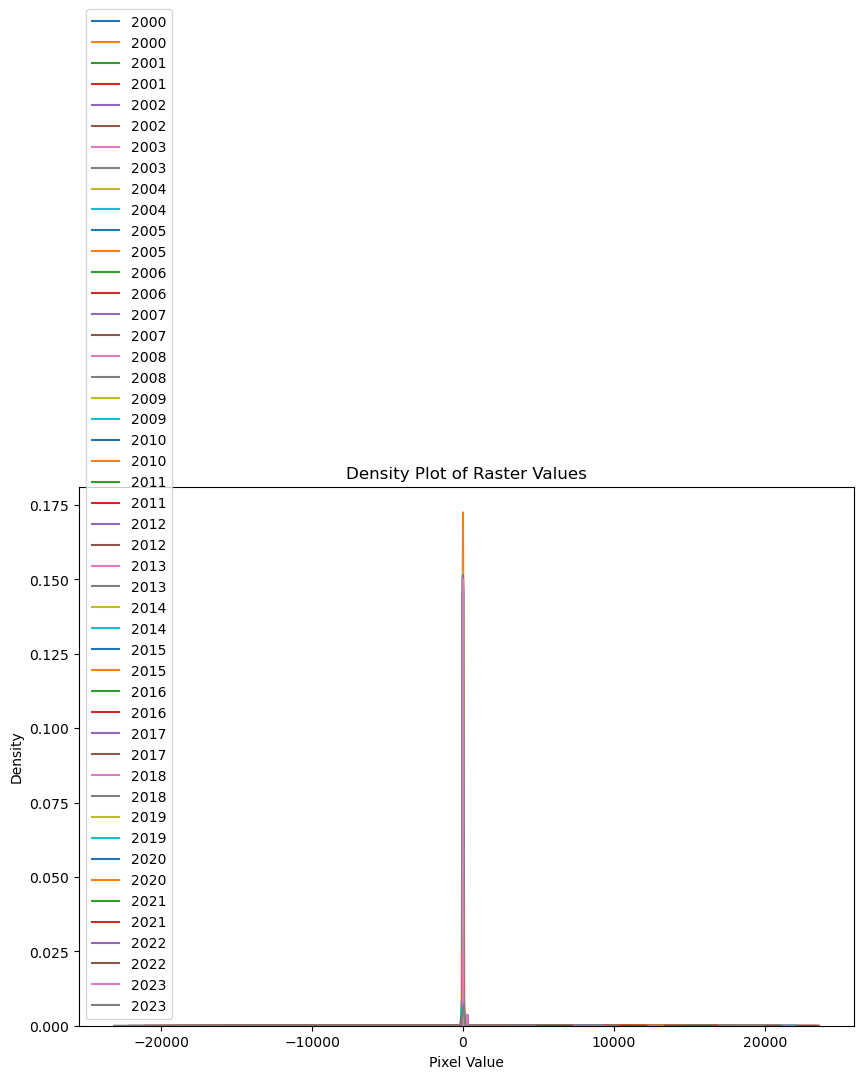

In [10]:
# Example usage
folder_path = r'A:\Copernicus\MR-VPP\reclassified_deos'  
raster_paths = get_raster_paths(folder_path)
plot_raster_density(raster_paths)

In [14]:
2870/(60*24)

1.9930555555555556

In [17]:
raster_paths[0]

'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2000_s1_cog.tif'

In [16]:
plt.figure(figsize=(10, 7))

for raster_path in raster_paths:
with rasterio.open(raster_path) as src:
    data = src.read(1).flatten()  # Read the first band and flatten it

# Plot the density curve
sns.kdeplot(data, label=os.path.basename(raster_path).split('_')[3], fill=False)

NameError: name 'data' is not defined

In [18]:
raster_paths[0]

'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2000_s1_cog.tif'

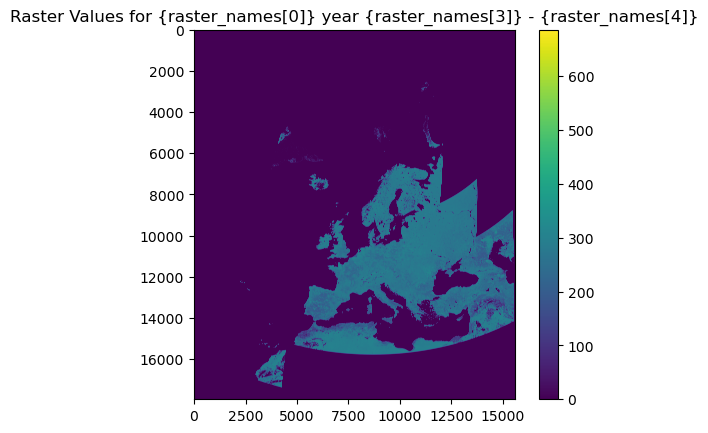

In [39]:
import rasterio
import matplotlib.pyplot as plt

# Open the raster file
with rasterio.open(raster_paths[0]) as src:
    raster = src.read(1)  # Read the first band

# Plot the raster
plt.imshow(raster, cmap='viridis')
plt.colorbar()
plt.title('Raster Values for {raster_names[0]} year {raster_names[3]} - {raster_names[4]}')
plt.show()


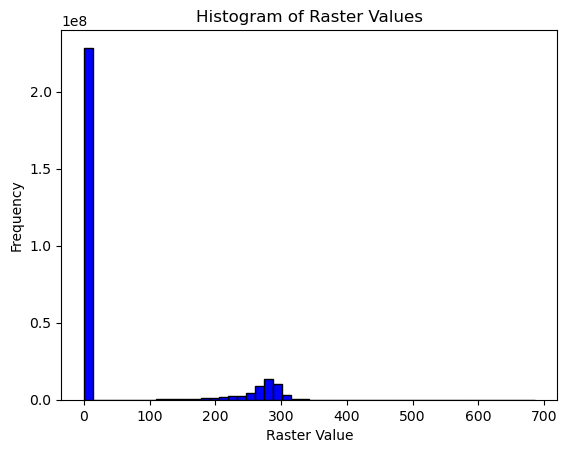

In [20]:
# Flatten the raster data to a 1D array
raster_flat = raster.flatten()

# Plot the histogram
plt.hist(raster_flat, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Raster Values')
plt.xlabel('Raster Value')
plt.ylabel('Frequency')
plt.show()

In [31]:
raster_names = os.path.basename(raster_paths[0]).split('_')
raster_names

['deos', 'mosaic', 'reclass', '2000', 's1', 'cog.tif']

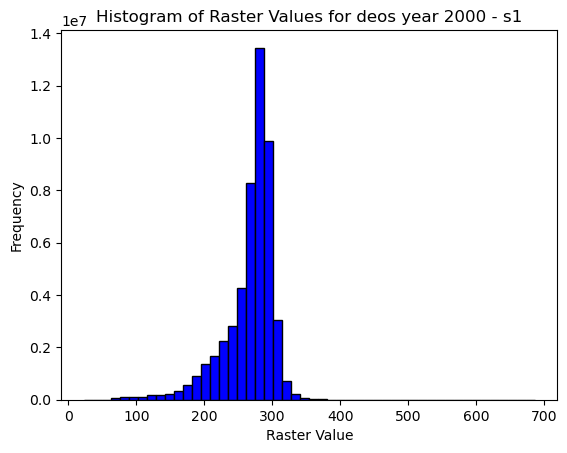

In [33]:
# Plot the histogram
raster_filtered = raster_flat[raster_flat > 0]
plt.hist(raster_filtered, bins=50, color='blue', edgecolor='black')

plt.title(f'Histogram of Raster Values for {raster_names[0]} year {raster_names[3]} - {raster_names[4]}')
plt.xlabel('Raster Value')
plt.ylabel('Frequency')
plt.show()

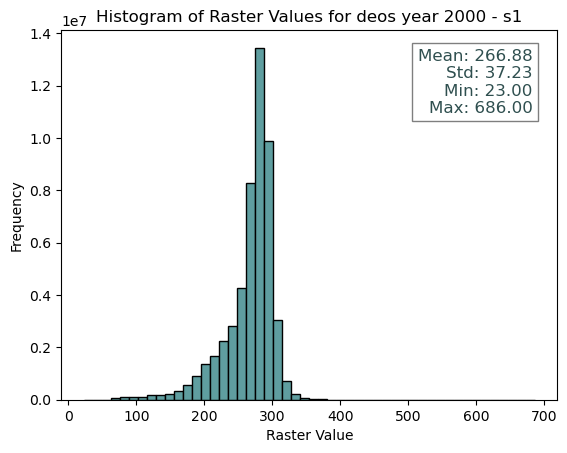

In [38]:
# List raster info from raster name
raster_info = os.path.basename(raster_paths[0]).split('_') 

# Open the raster file
with rasterio.open(raster_paths[0]) as src:
    raster = src.read(1)  # Read the first band

# Filter nodata values
raster_filtered = raster_flat[raster_flat > 0]

# Calculate mean and standard deviation
mean_val = np.mean(raster_filtered)
std_val = np.std(raster_filtered)
min_val = np.min(raster_filtered)
max_val = np.max(raster_filtered)

# Plot the histogram
plt.hist(raster_filtered, bins=50, color='cadetblue', edgecolor='black')
plt.title(f'Histogram of Raster Values for {raster_info[0]} year {raster_info[3]} - {raster_info[4]}')
plt.xlabel('Raster Value')
plt.ylabel('Frequency')

# Add mean and standard deviation text
plt.text(0.95, 0.95, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes,
         color='darkslategrey', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [41]:
raster_paths[:3]

['A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2000_s1_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2000_s2_cog.tif',
 'A:\\Copernicus\\MR-VPP\\reclassified_deos\\deos_mosaic_reclass_2001_s1_cog.tif']

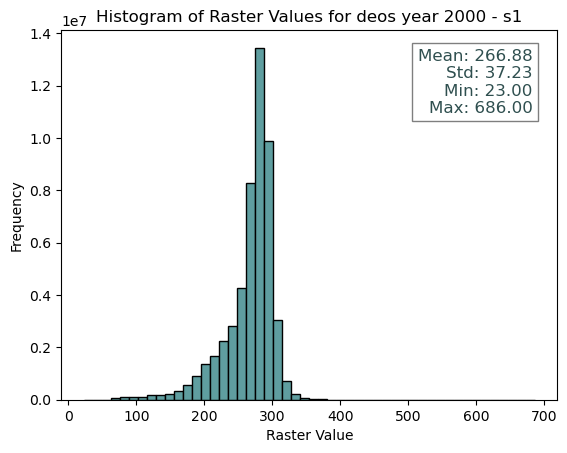

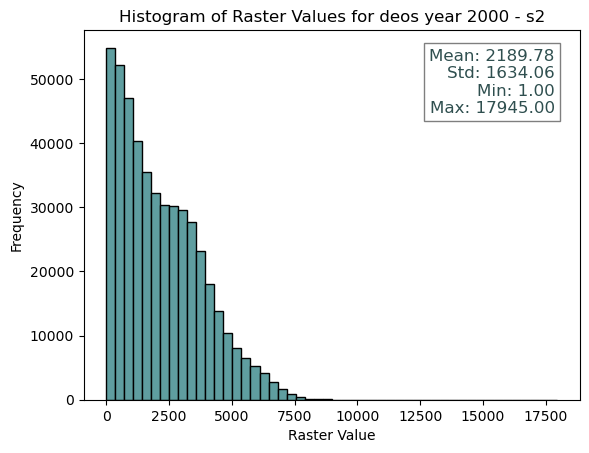

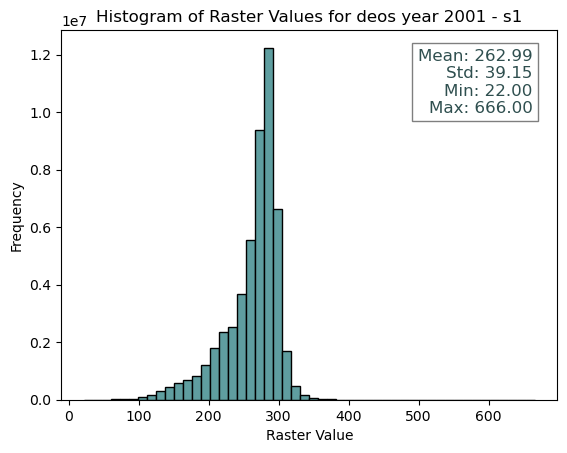

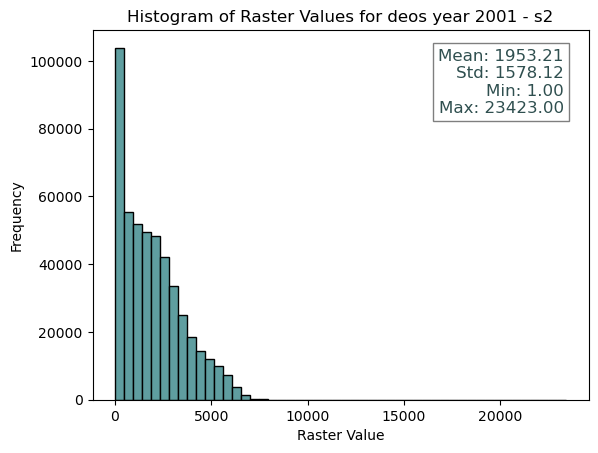

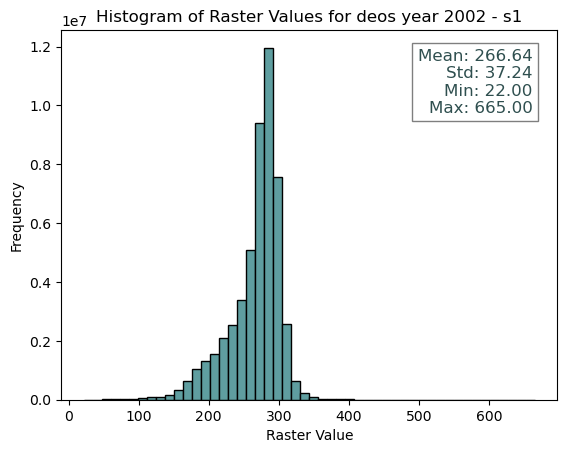

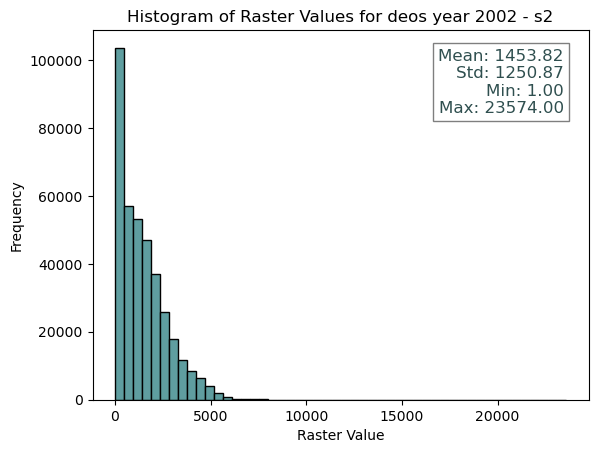

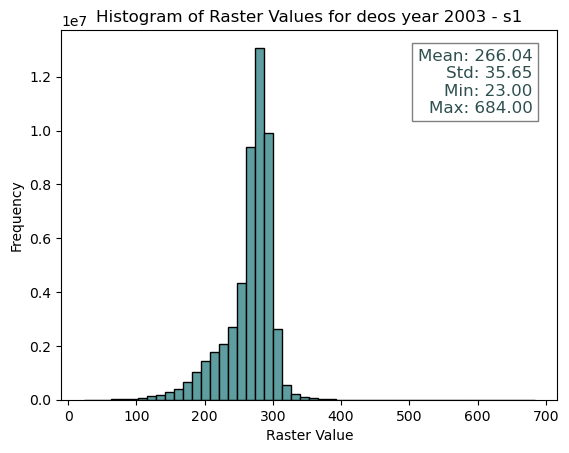

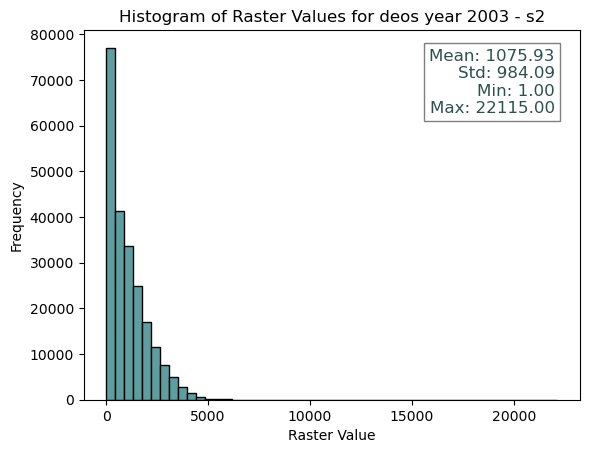

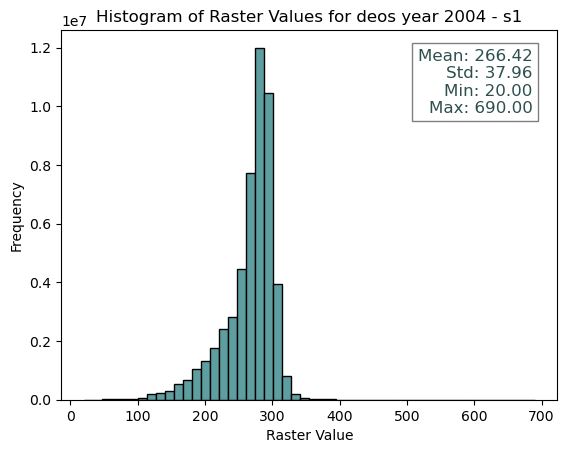

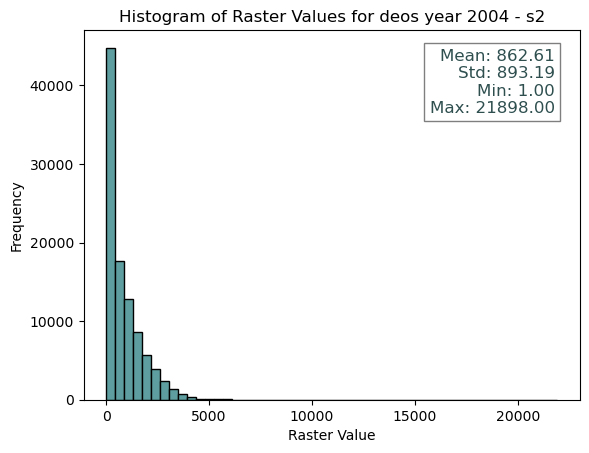

(['deos',
  'deos',
  'deos',
  'deos',
  'deos',
  'deos',
  'deos',
  'deos',
  'deos',
  'deos'],
 ['2000',
  '2000',
  '2001',
  '2001',
  '2002',
  '2002',
  '2003',
  '2003',
  '2004',
  '2004'],
 ['s1', 's2', 's1', 's2', 's1', 's2', 's1', 's2', 's1', 's2'],
 [23, 1, 22, 1, 22, 1, 23, 1, 20, 1],
 [686, 17945, 666, 23423, 665, 23574, 684, 22115, 690, 21898],
 [266.88046283115466,
  2189.7776889933743,
  262.9867708833467,
  1953.2127293854094,
  266.6407273215207,
  1453.8223945315308,
  266.0394285926568,
  1075.9340331110702,
  266.4156130209426,
  862.6067972956561],
 [686, 17945, 666, 23423, 665, 23574, 684, 22115, 690, 21898])

In [46]:
plot_raster_histogram(raster_paths[:10])

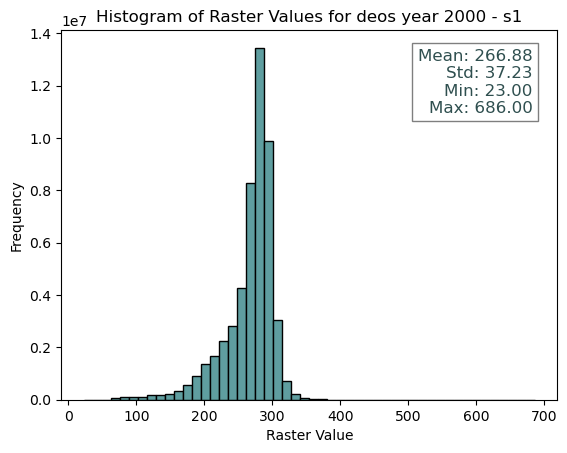

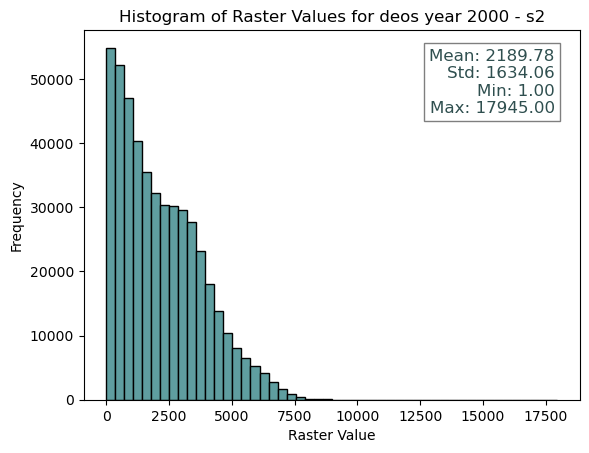

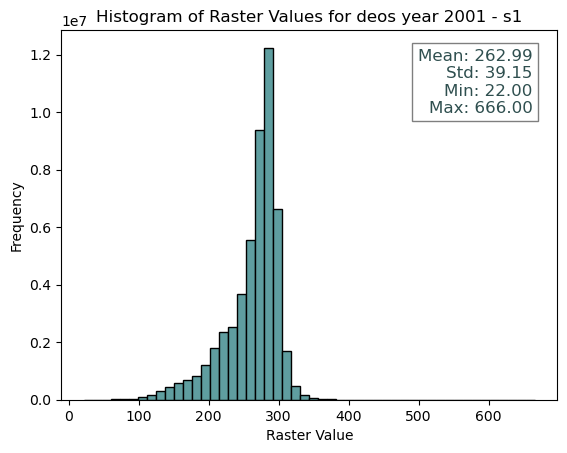

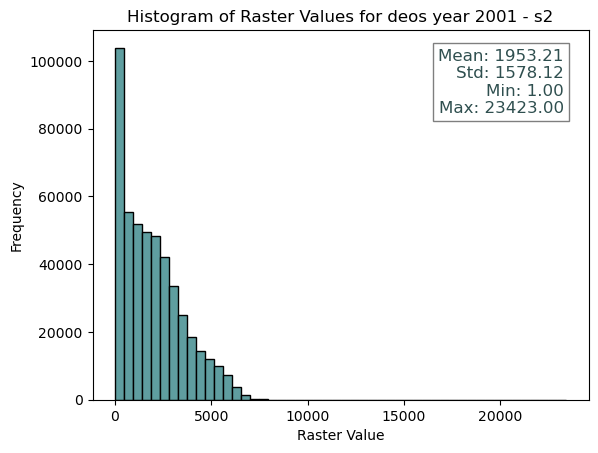

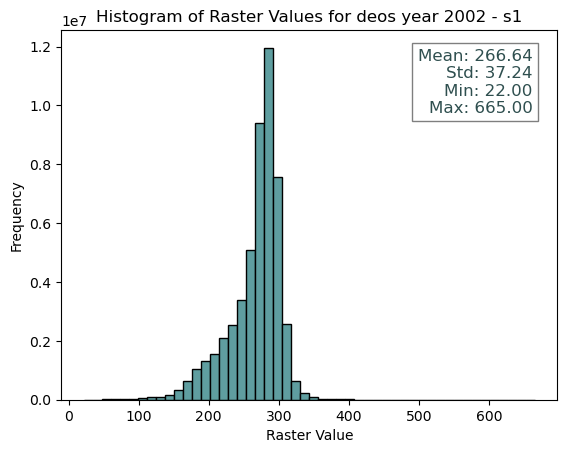

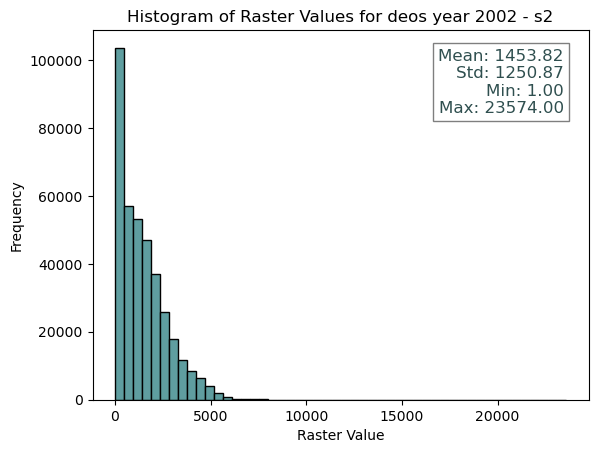

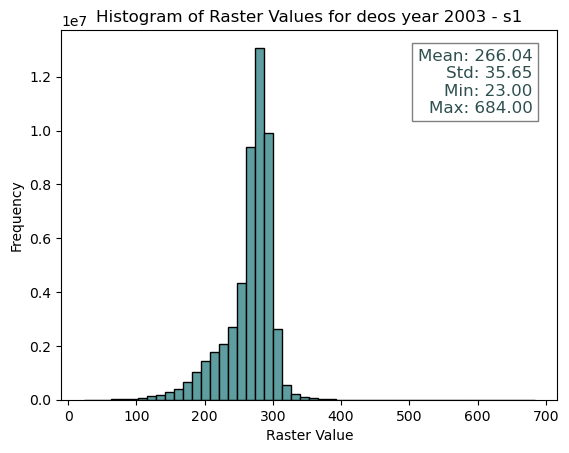

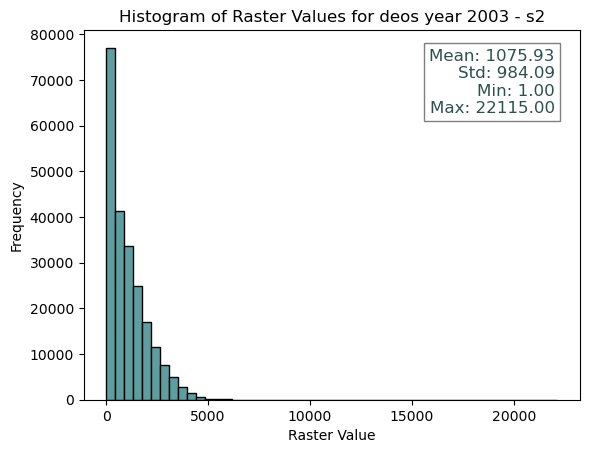

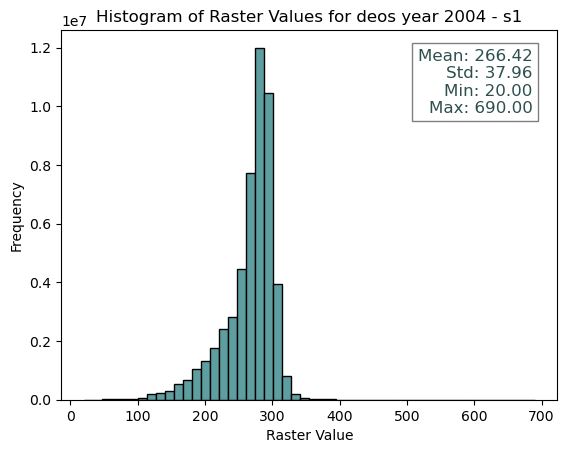

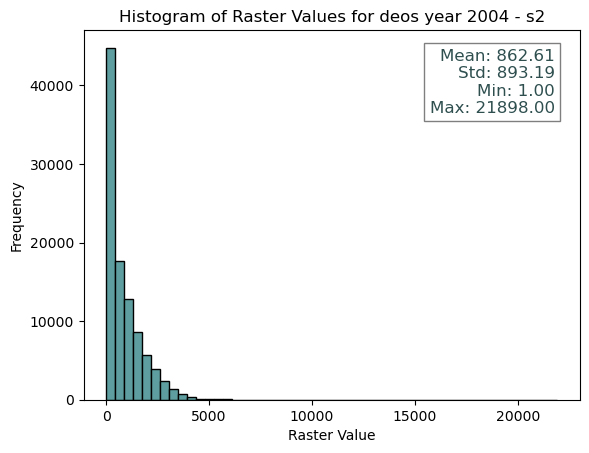

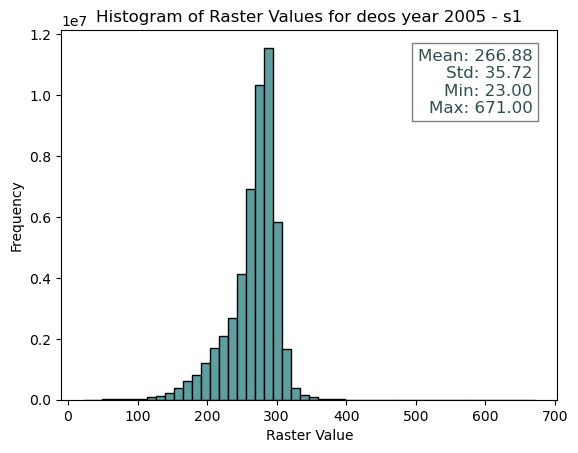

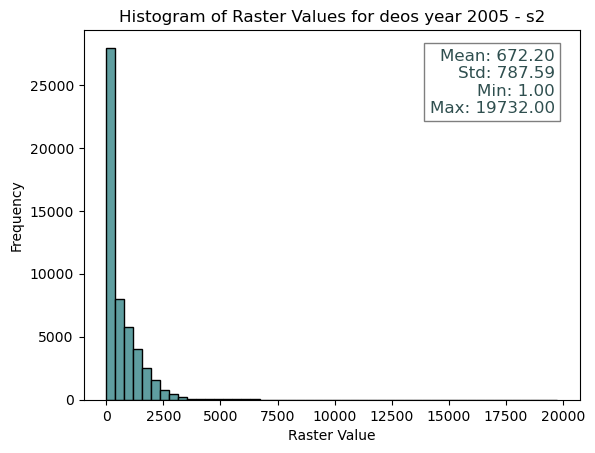

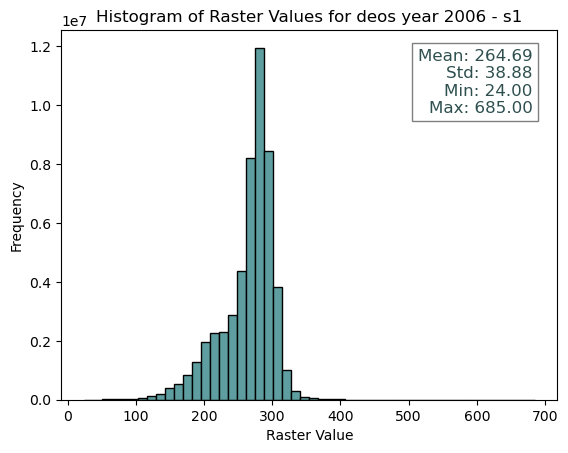

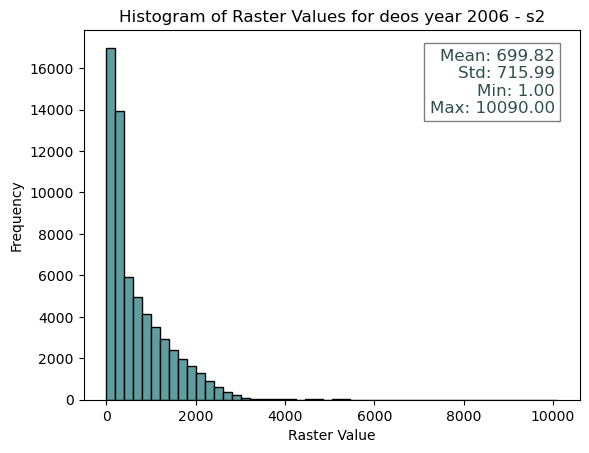

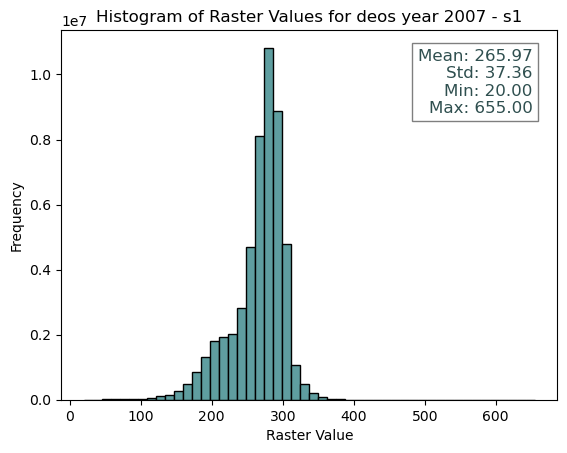

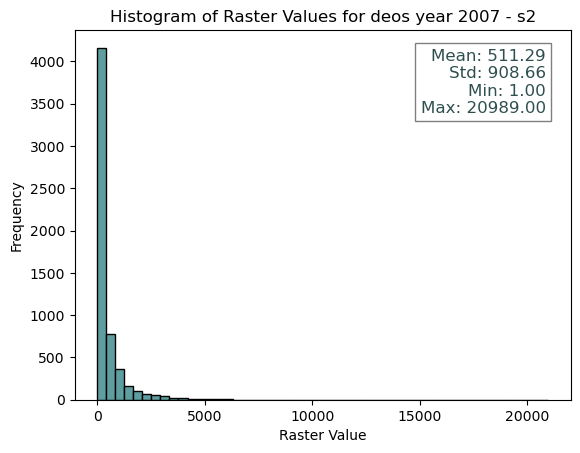

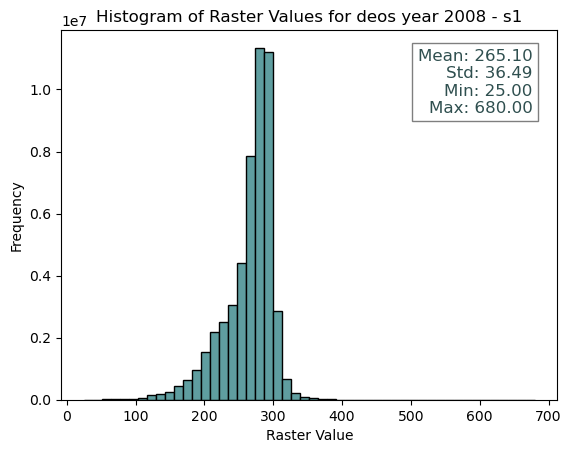

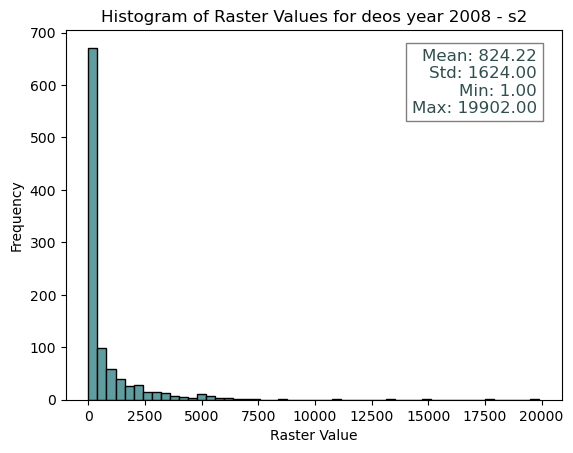

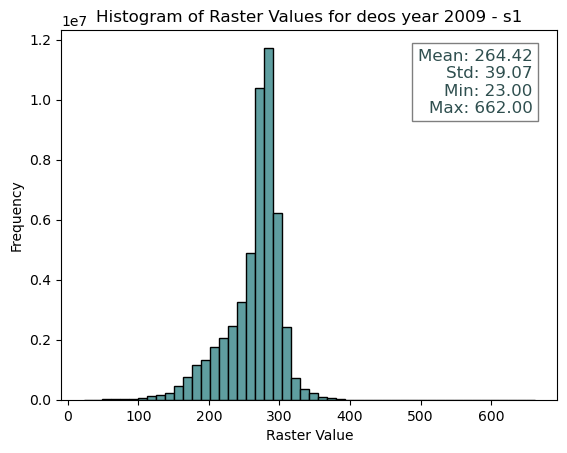

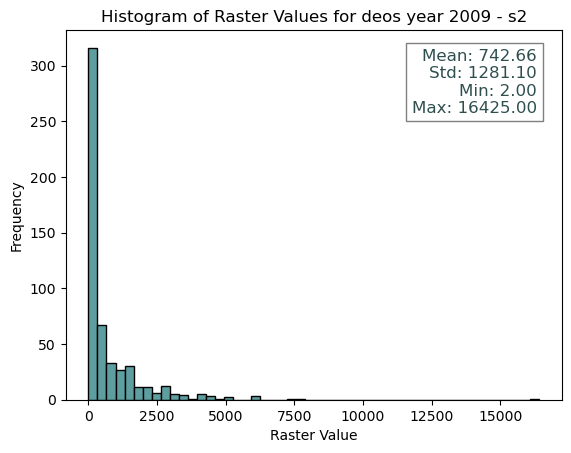

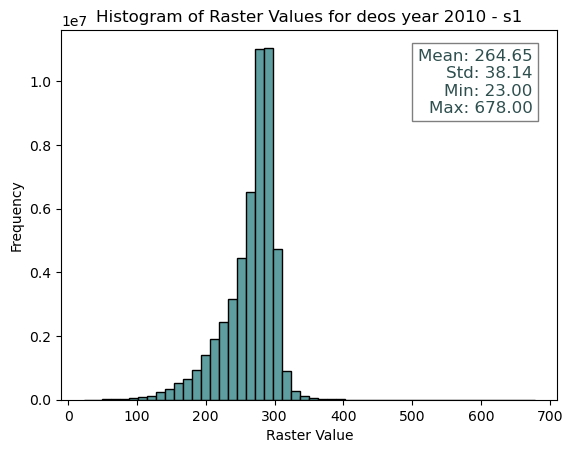

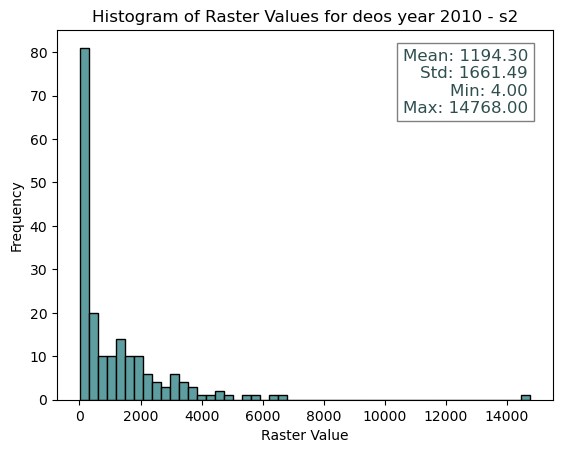

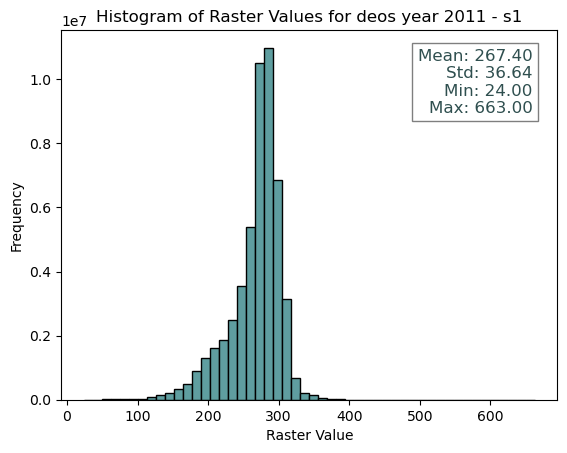

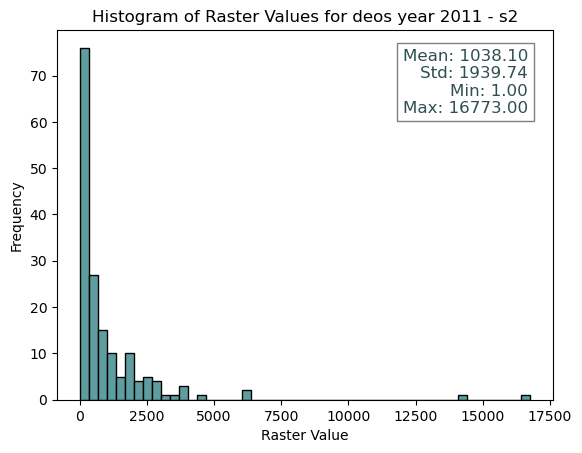

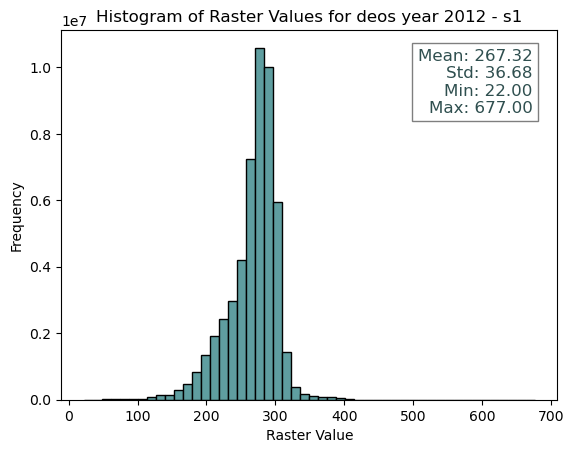

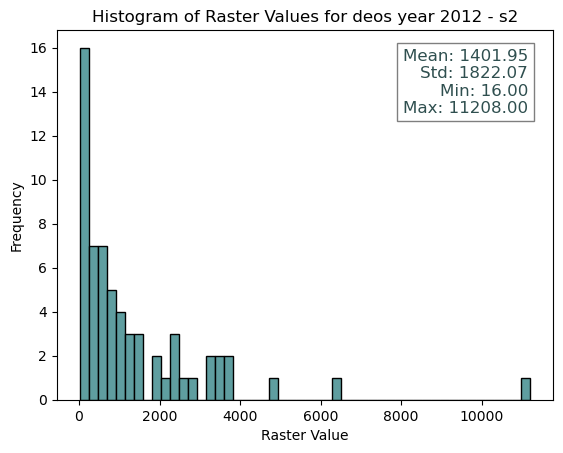

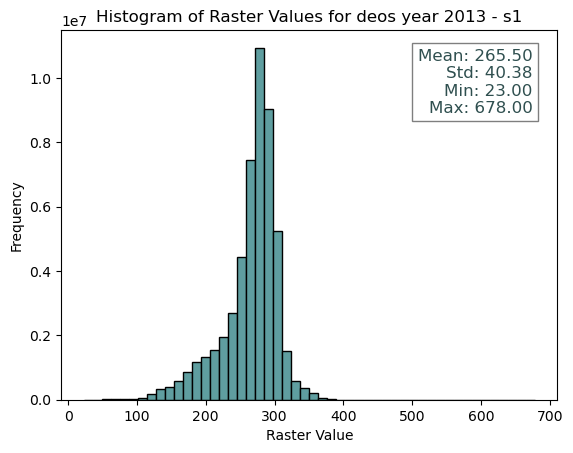

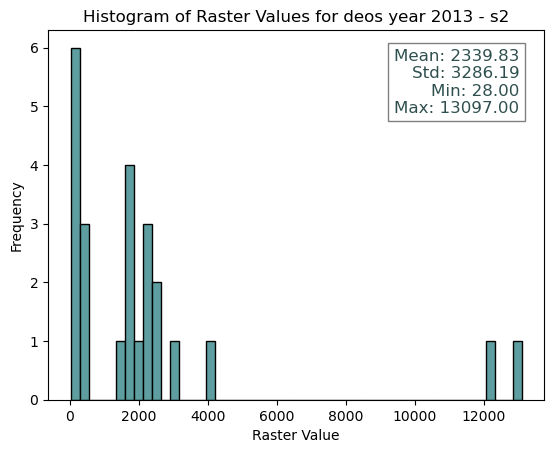

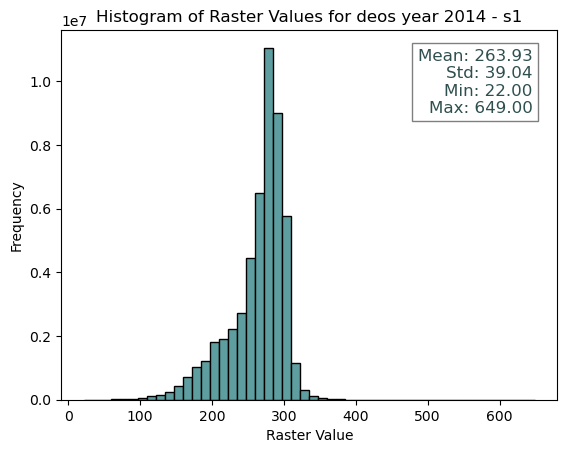

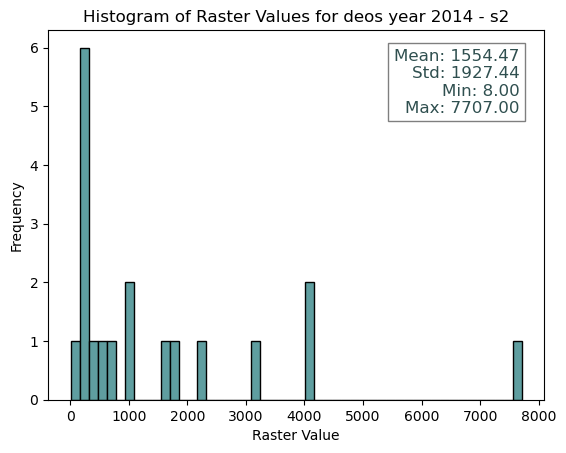

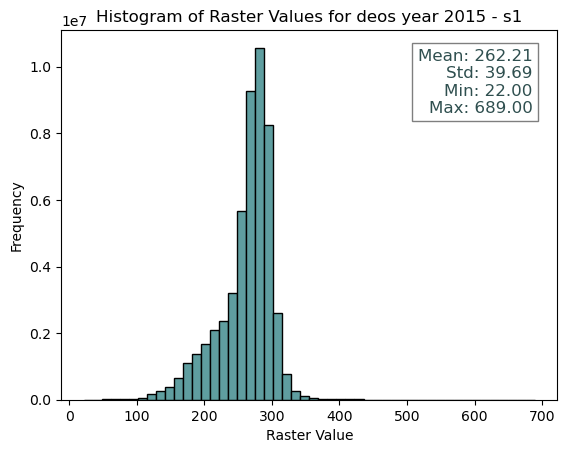

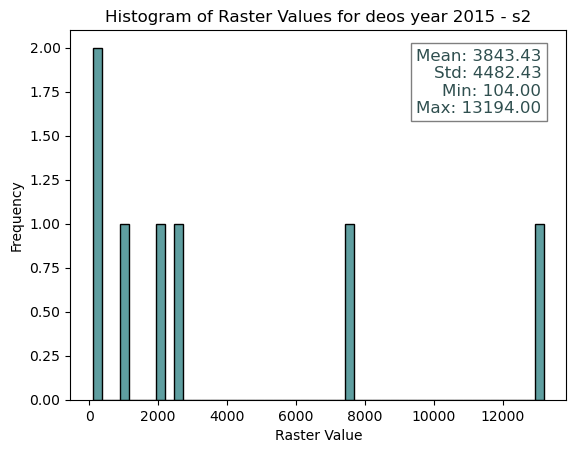

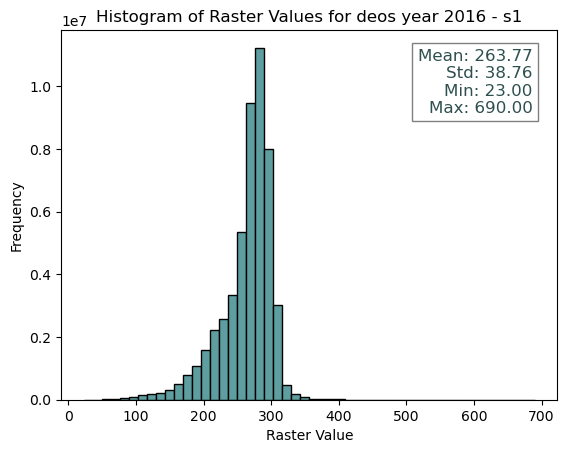

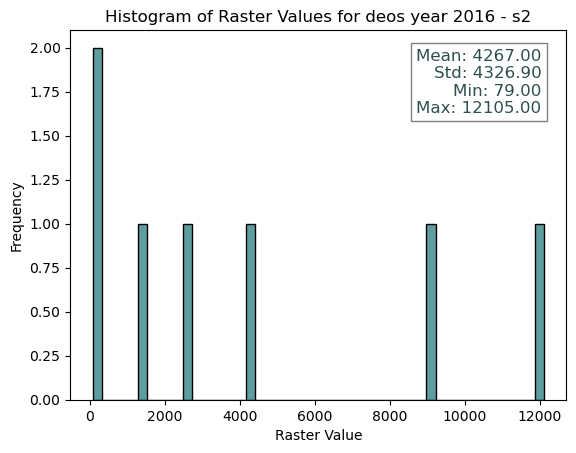

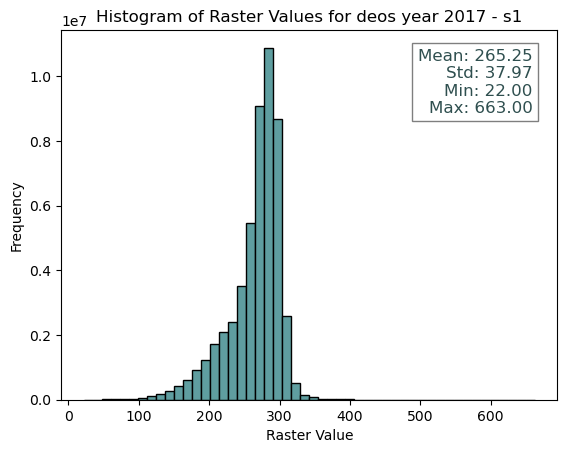

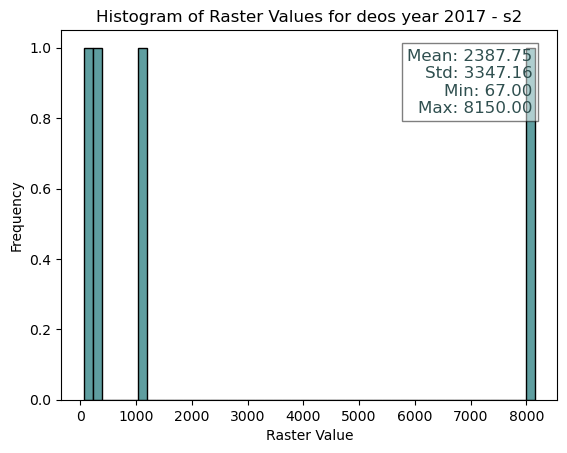

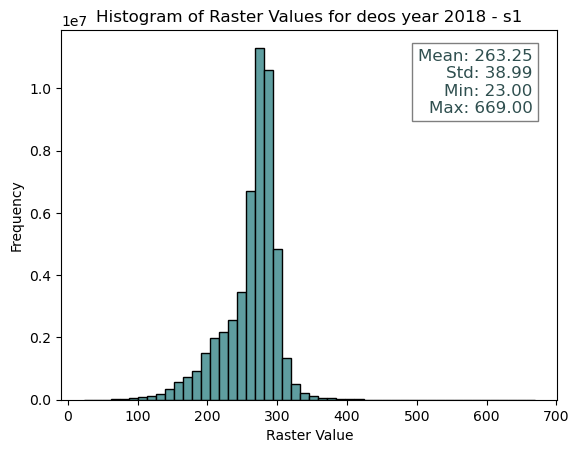

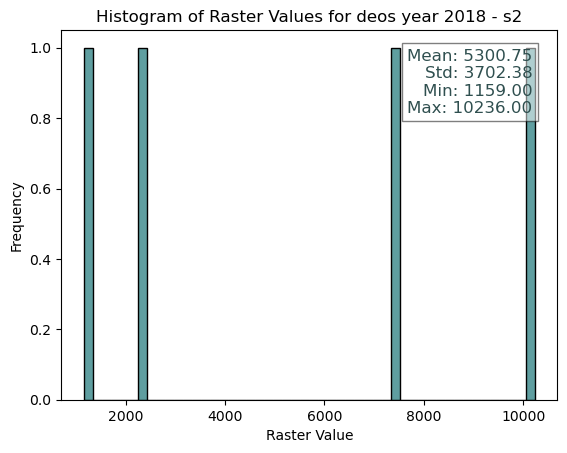

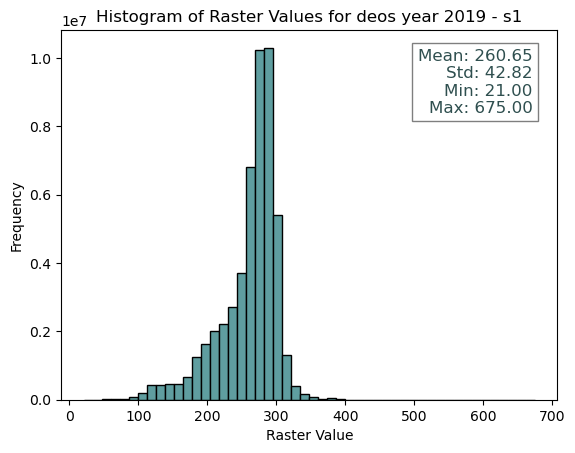

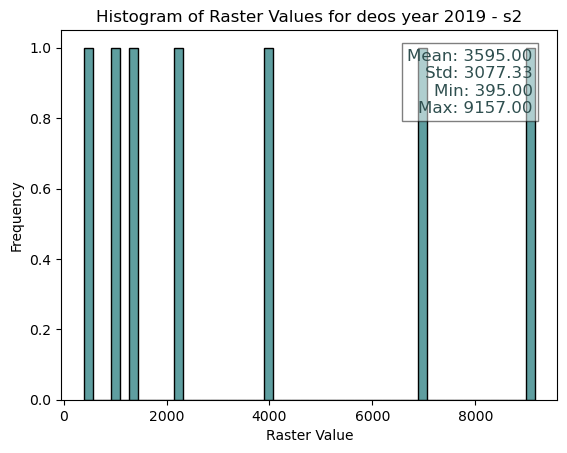

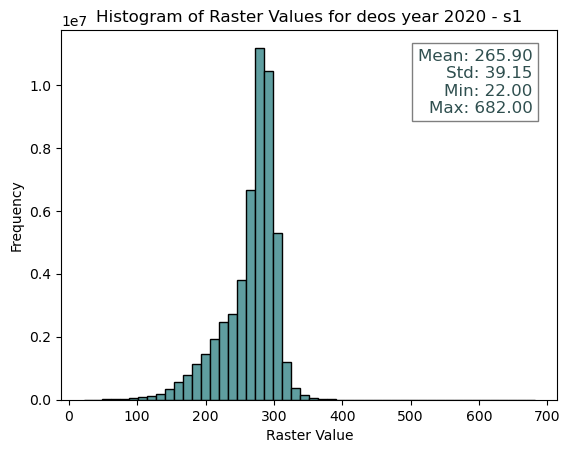

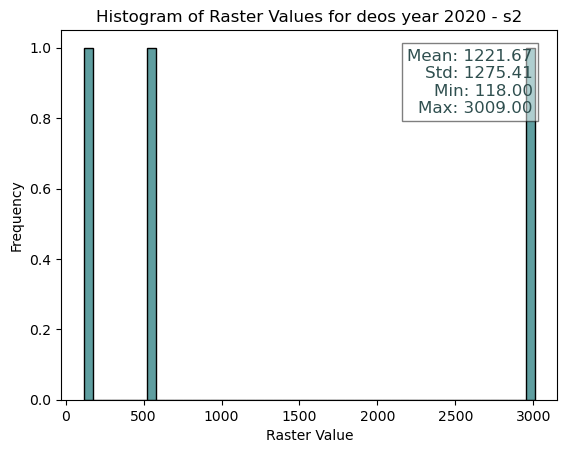

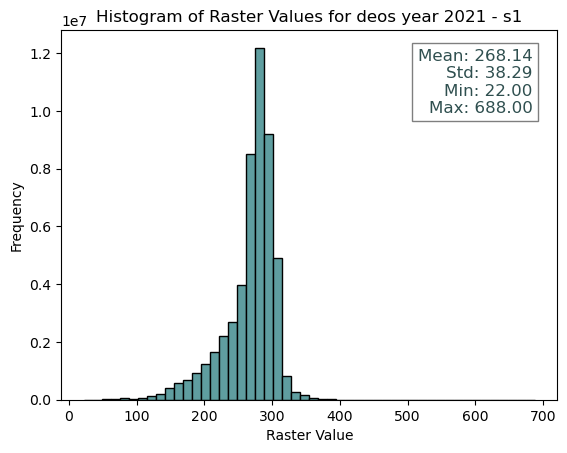

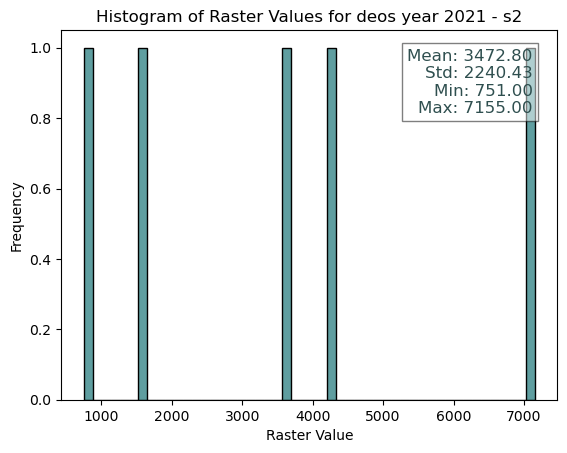

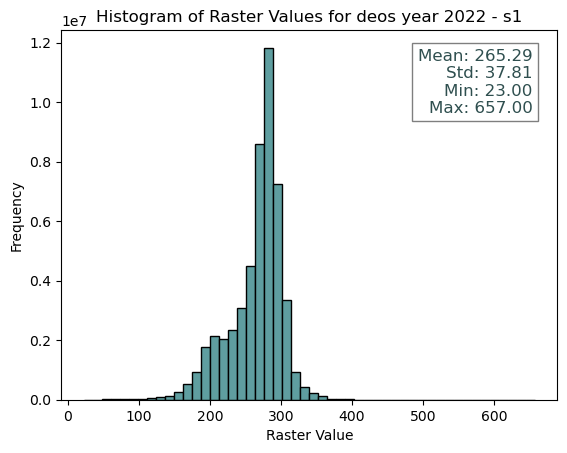

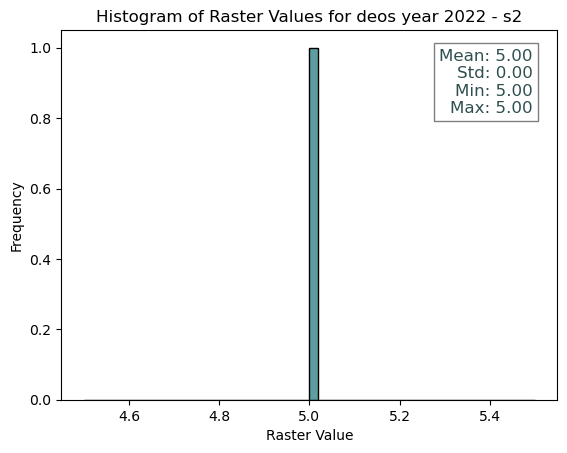

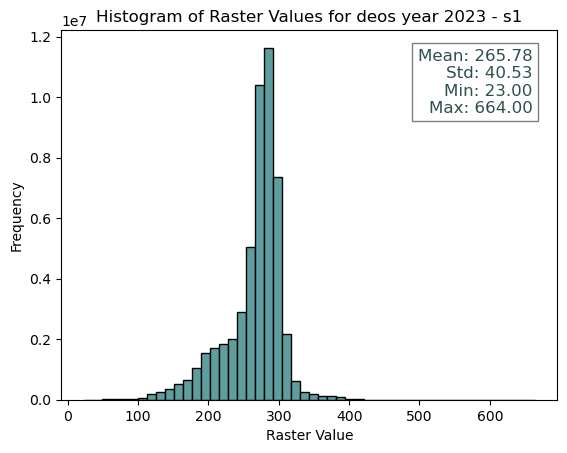

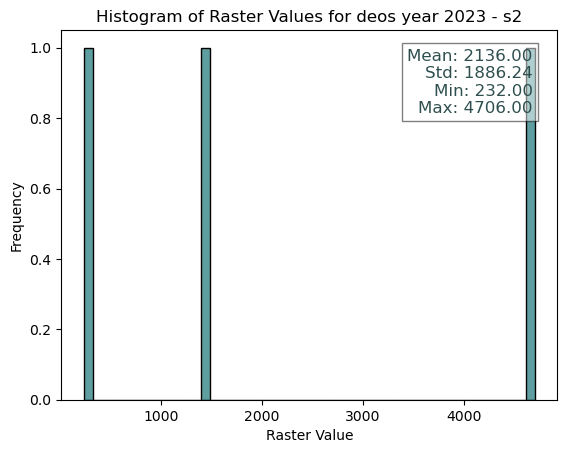

sos_eos  Year Season  Min_val  Max_val     Mean_val  Std_val
0     deos  2000     s1       23      686   266.880463      686
1     deos  2000     s2        1    17945  2189.777689    17945
2     deos  2001     s1       22      666   262.986771      666
3     deos  2001     s2        1    23423  1953.212729    23423
4     deos  2002     s1       22      665   266.640727      665
5     deos  2002     s2        1    23574  1453.822395    23574
6     deos  2003     s1       23      684   266.039429      684
7     deos  2003     s2        1    22115  1075.934033    22115
8     deos  2004     s1       20      690   266.415613      690
9     deos  2004     s2        1    21898   862.606797    21898
10    deos  2005     s1       23      671   266.882906      671
11    deos  2005     s2        1    19732   672.202996    19732
12    deos  2006     s1       24      685   264.688188      685
13    deos  2006     s2        1    10090   699.818217    10090
14    deos  2007     s1       20      655   265.968427      655
15    deos  2007     s2        1    20989   511.286155    20989
16    deos  2008     s1       25      680   265.104680      680
17    deos  2008     s2        1    19902   824.220039    19902
18    deos  2009     s1       23      662   264.415921      662
19    deos  2009     s2        2    16425   742.657407    16425
20    deos  2010     s1       23      678   264.653457      678
21    deos  2010     s2        4    14768  1194.298429    14768
22    deos  2011     s1       24      663   267.402804      663
23    deos  2011     s2        1    16773  1038.102410    16773
24    deos  2012     s1       22      677   267.315867      677
25    deos  2012     s2       16    11208  1401.951613    11208
26    deos  2013     s1       23      678   265.503005      678
27    deos  2013     s2       28    13097  2339.833333    13097
28    deos  2014     s1       22      649   263.929256      649
29    deos  2014     s2        8     7707  1554.473684     7707
30    deos  2015     s1       22      689   262.212425      689
31    deos  2015     s2      104    13194  3843.428571    13194
32    deos  2016     s1       23      690   263.766466      690
33    deos  2016     s2       79    12105  4267.000000    12105
34    deos  2017     s1       22      663   265.253677      663
35    deos  2017     s2       67     8150  2387.750000     8150
36    deos  2018     s1       23      669   263.252442      669
37    deos  2018     s2     1159    10236  5300.750000    10236
38    deos  2019     s1       21      675   260.651560      675
39    deos  2019     s2      395     9157  3595.000000     9157
40    deos  2020     s1       22      682   265.902196      682
41    deos  2020     s2      118     3009  1221.666667     3009
42    deos  2021     s1       22      688   268.144012      688
43    deos  2021     s2      751     7155  3472.800000     7155
44    deos  2022     s1       23      657   265.293023      657
45    deos  2022     s2        5        5     5.000000        5
46    deos  2023     s1       23      664   265.776234      664
47    deos  2023     s2      232     4706  2136.000000     4706

In [57]:
df = plot_raster_histogram(raster_paths)
df

In [56]:
df

sos_eos  Year Season  Min_val  Max_val     Mean_val  Std_val
0    deos  2000     s1       23      686   266.880463      686
1    deos  2000     s2        1    17945  2189.777689    17945
2    deos  2001     s1       22      666   262.986771      666
3    deos  2001     s2        1    23423  1953.212729    23423
4    deos  2002     s1       22      665   266.640727      665
5    deos  2002     s2        1    23574  1453.822395    23574

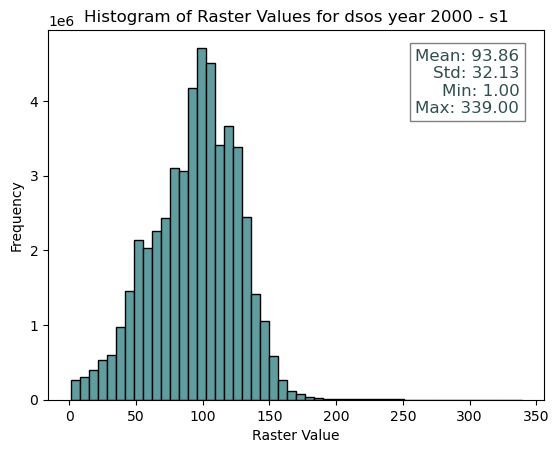

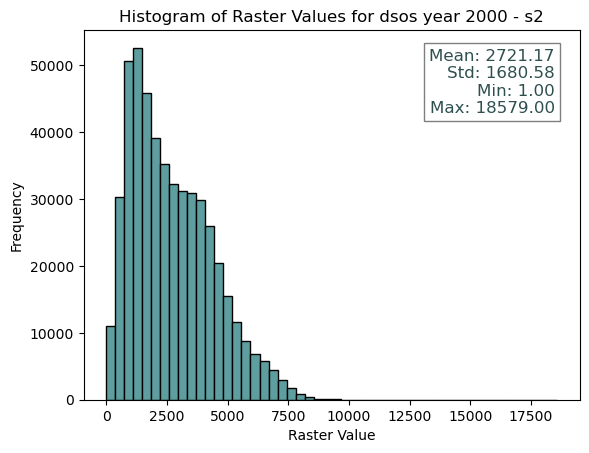

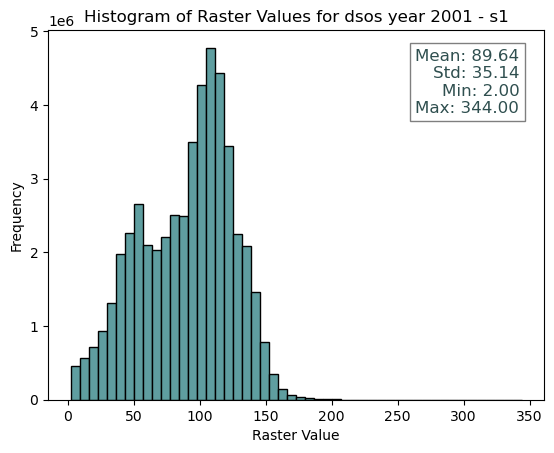

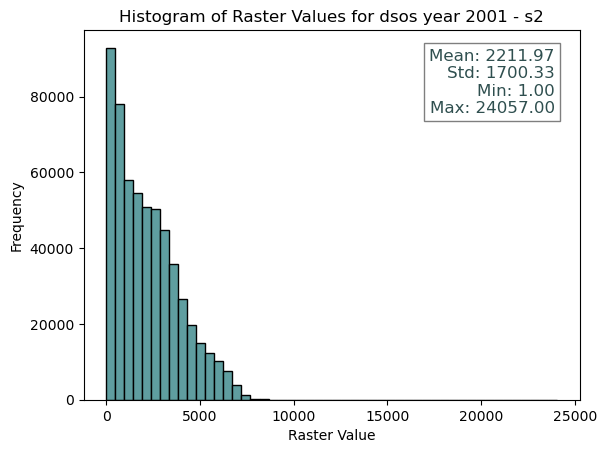

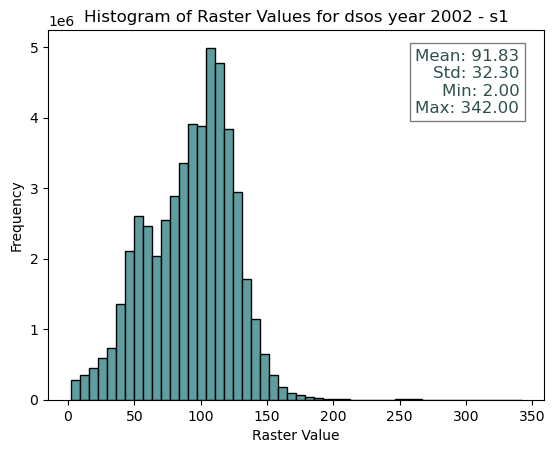

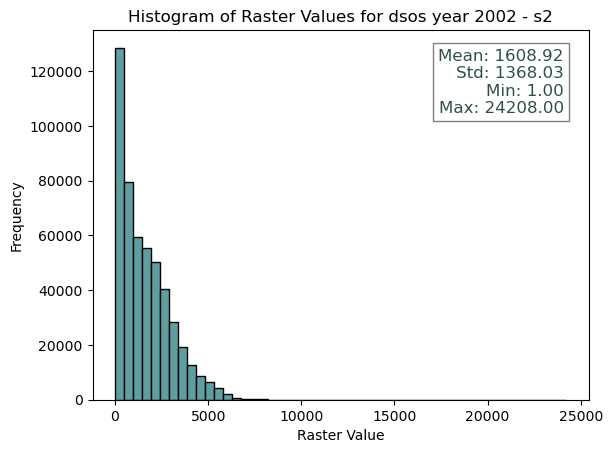

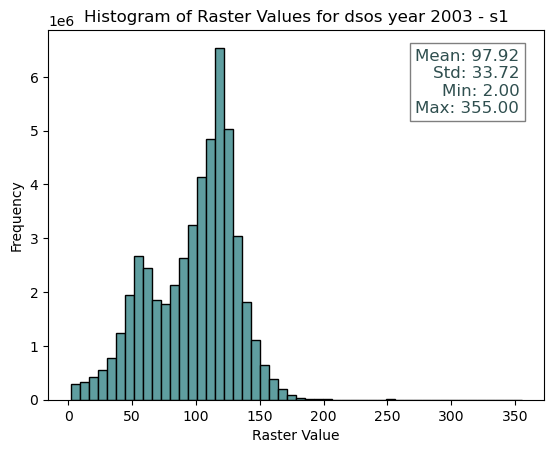

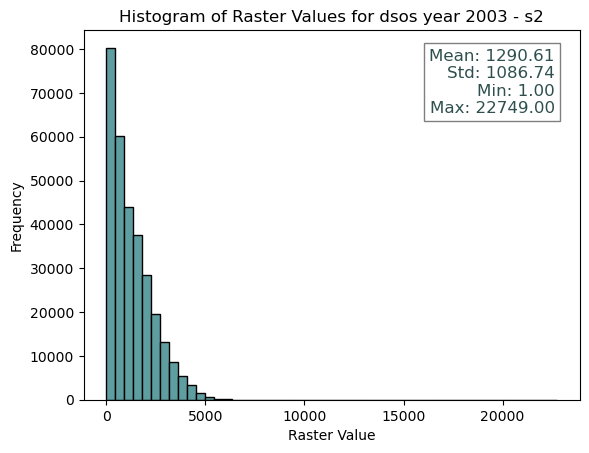

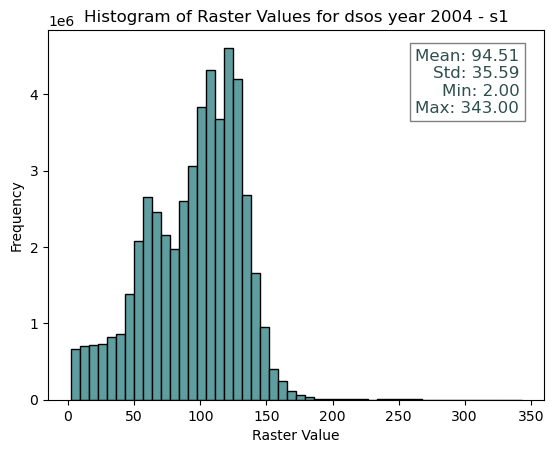

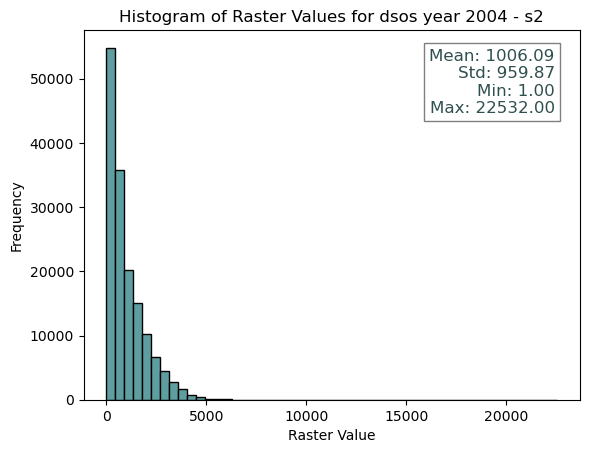

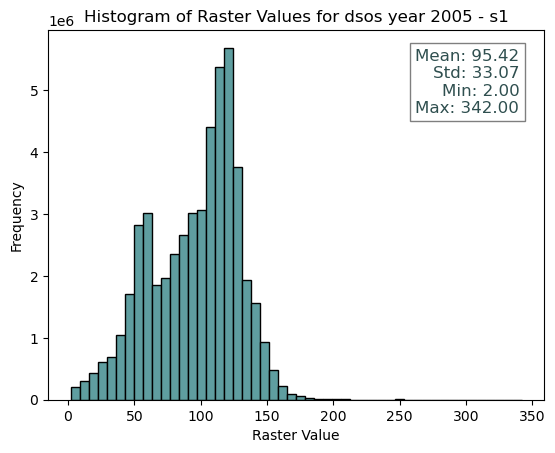

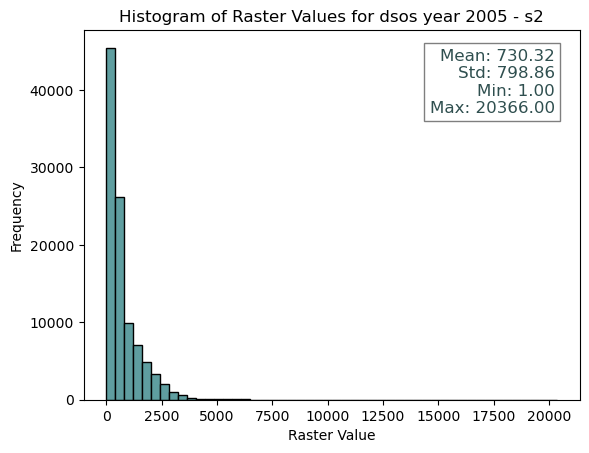

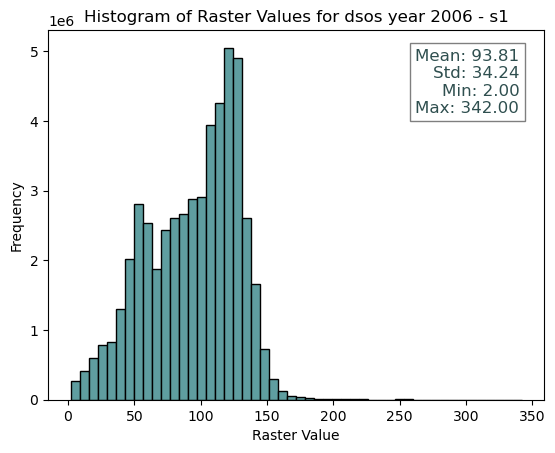

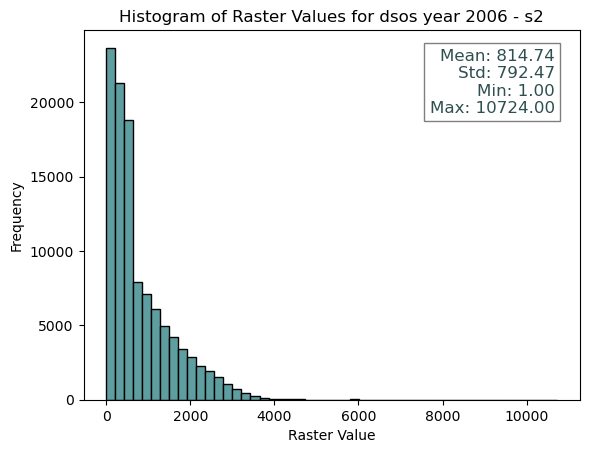

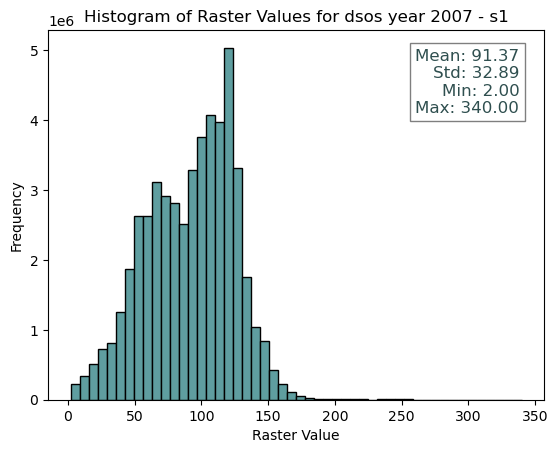

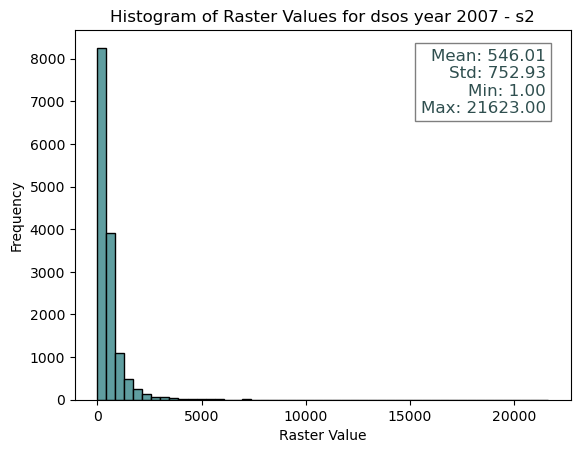

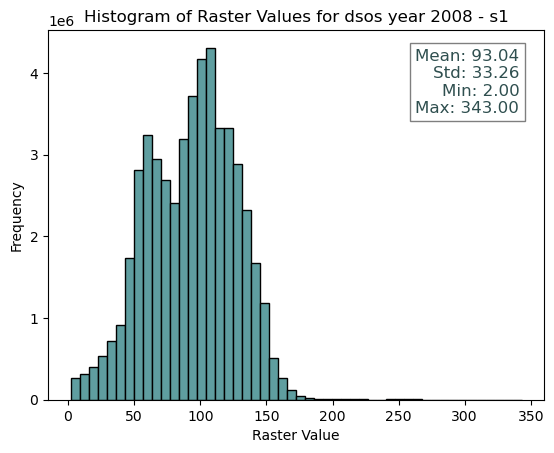

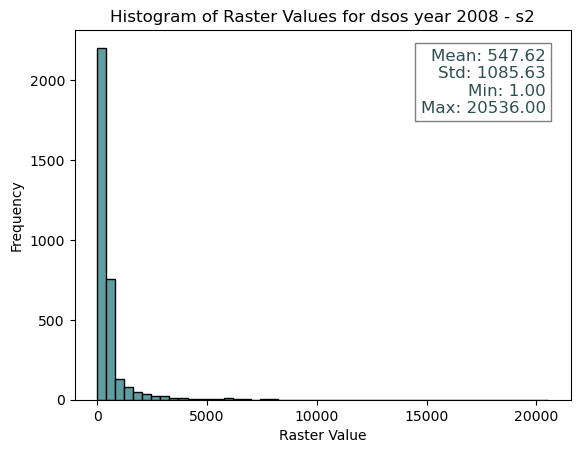

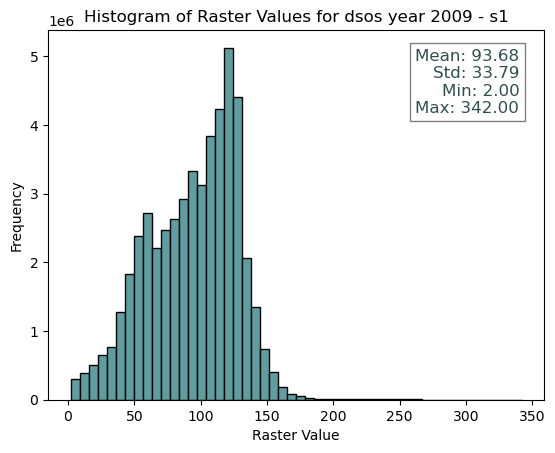

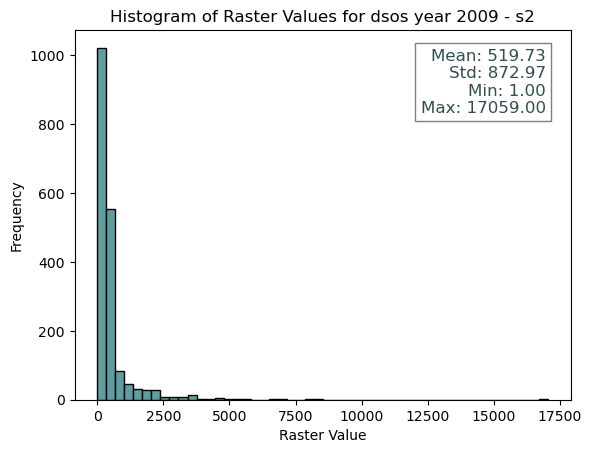

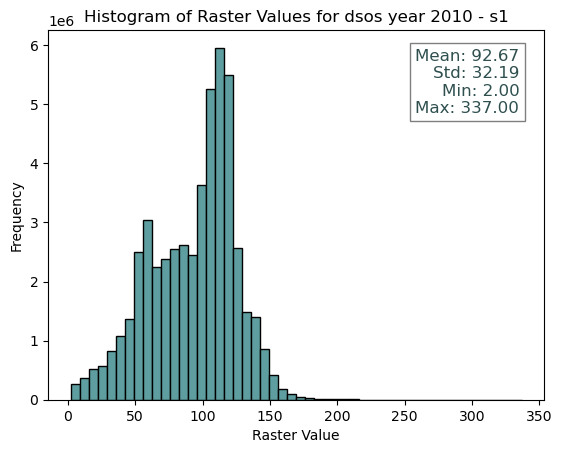

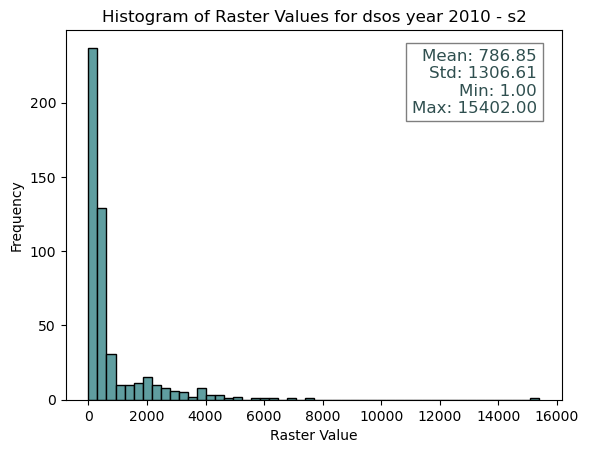

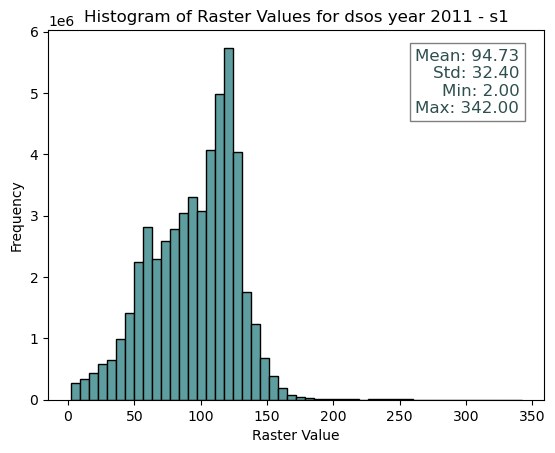

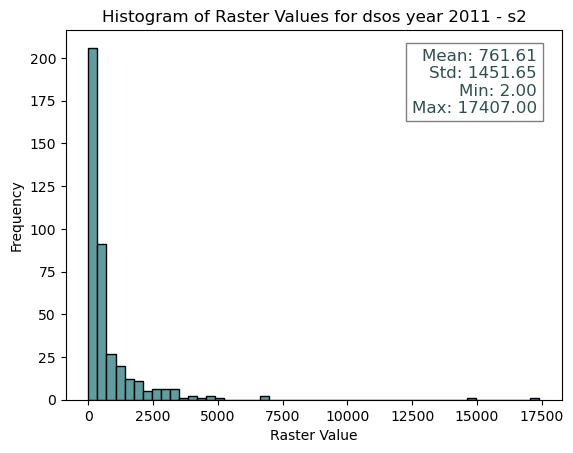

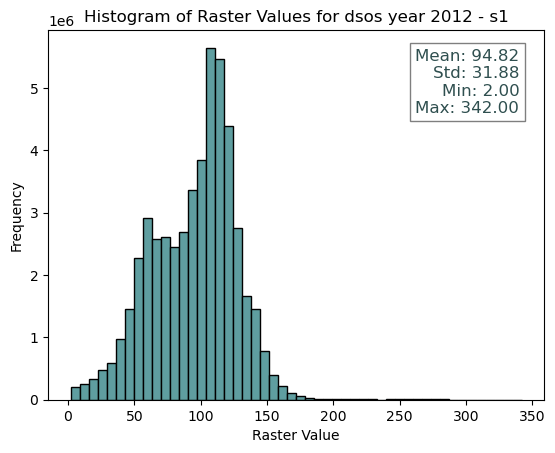

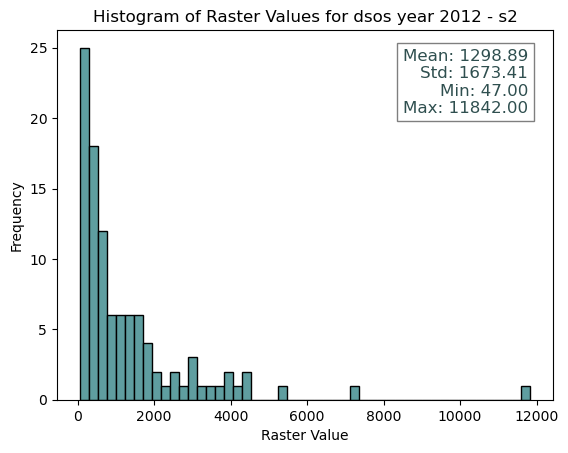

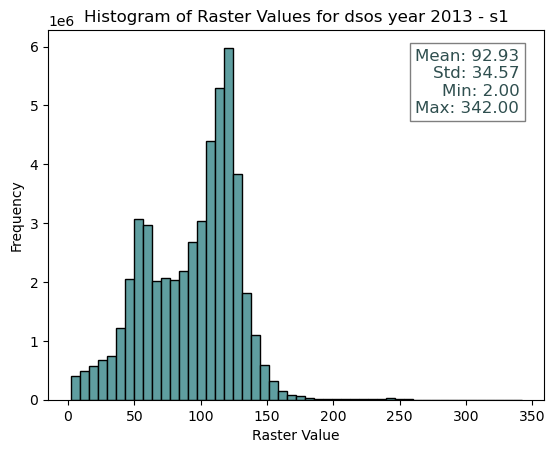

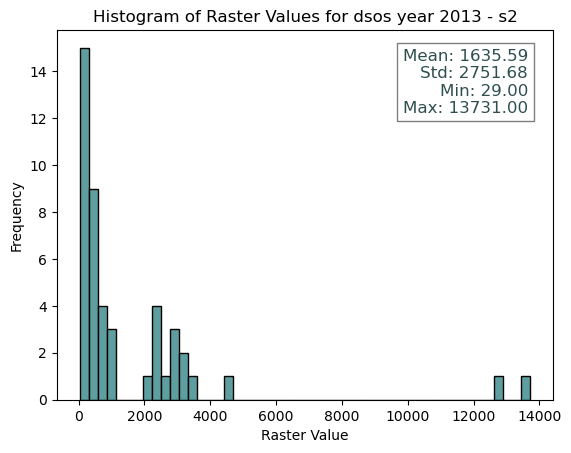

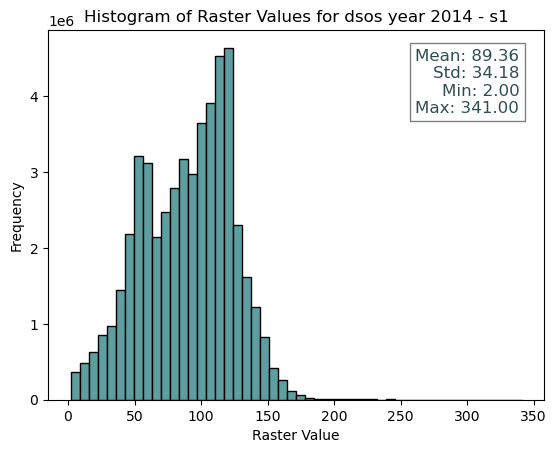

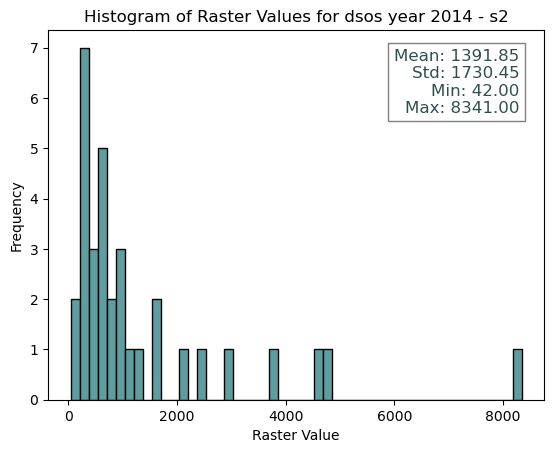

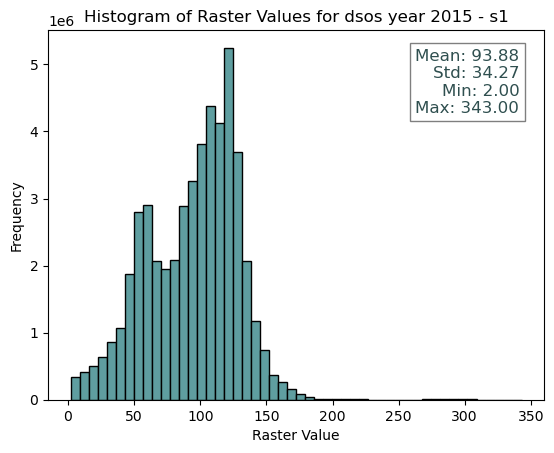

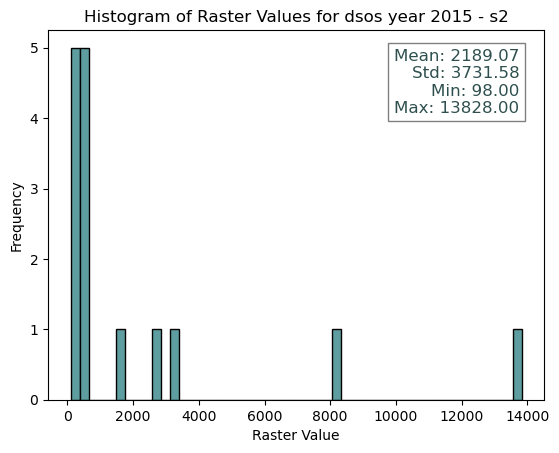

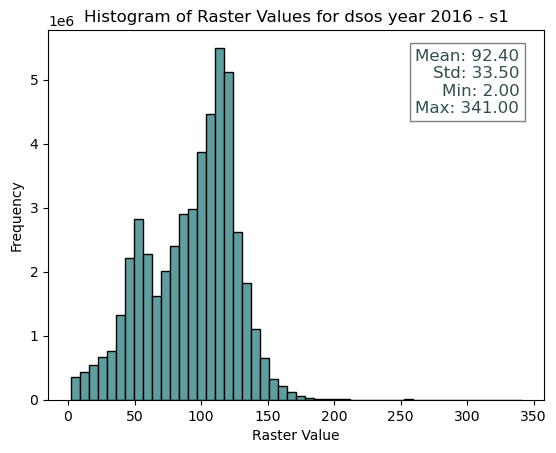

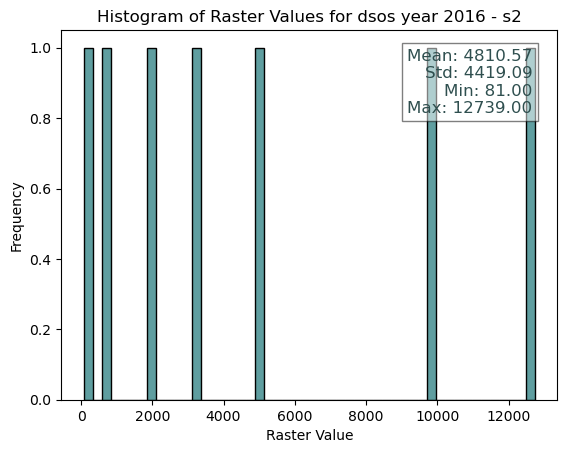

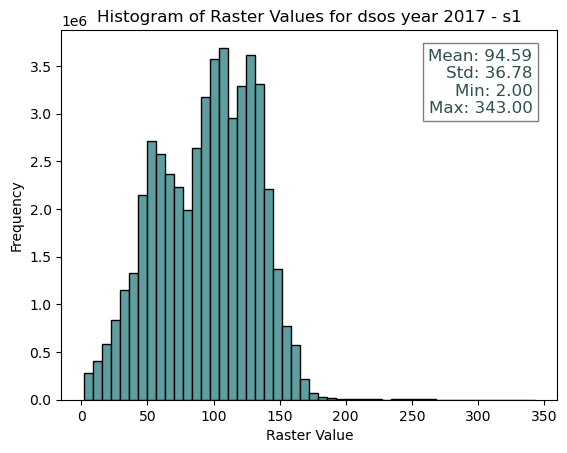

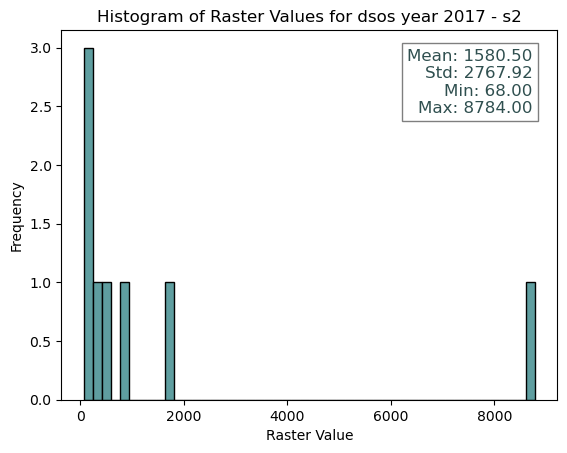

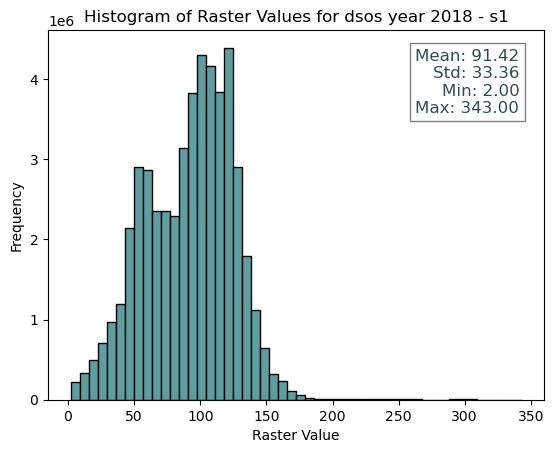

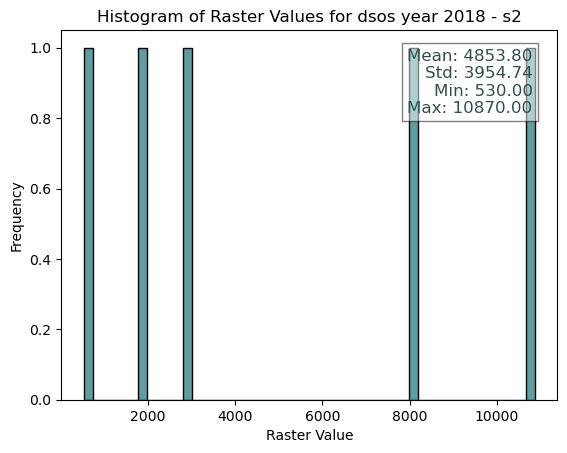

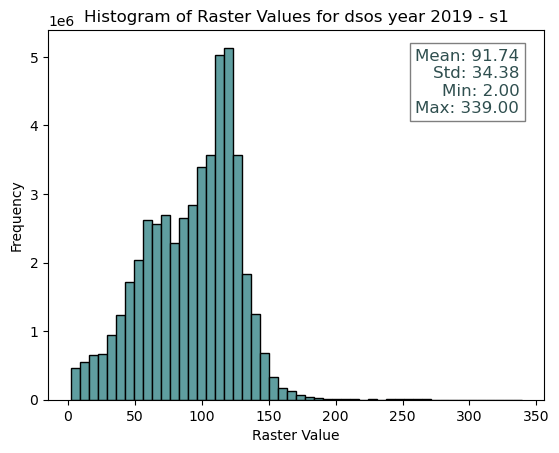

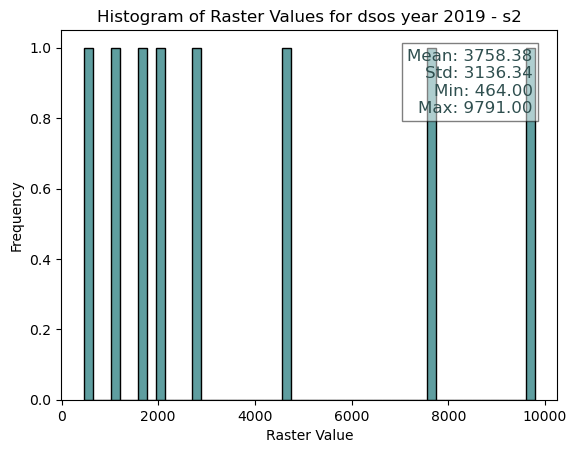

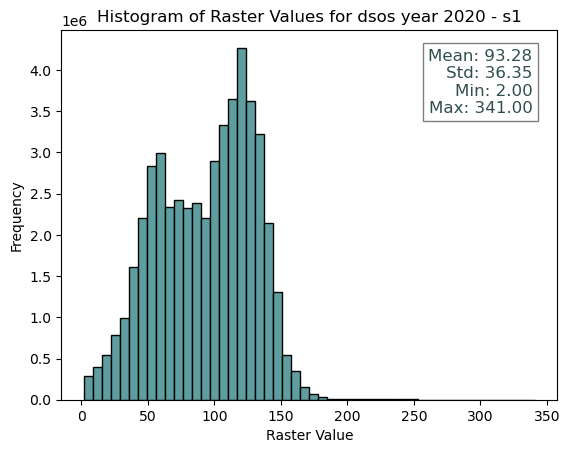

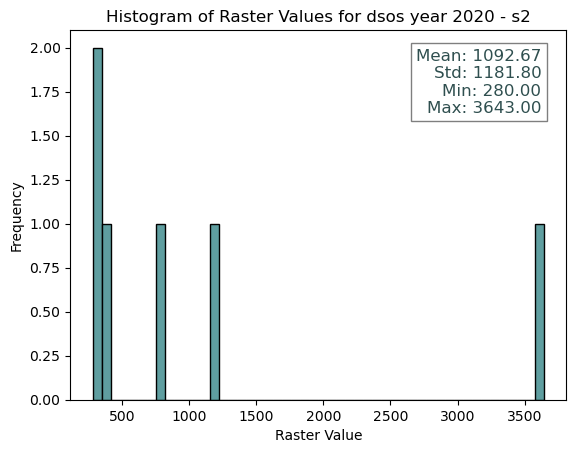

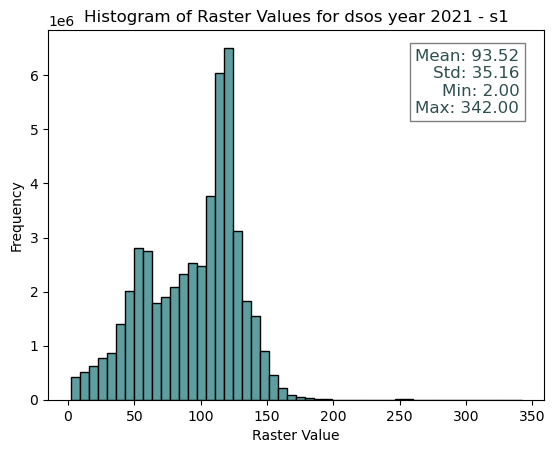

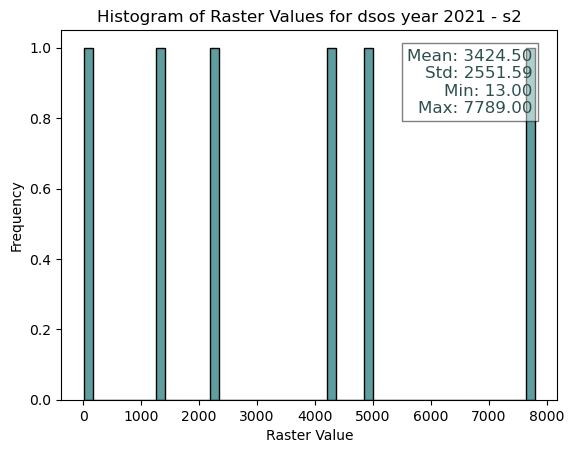

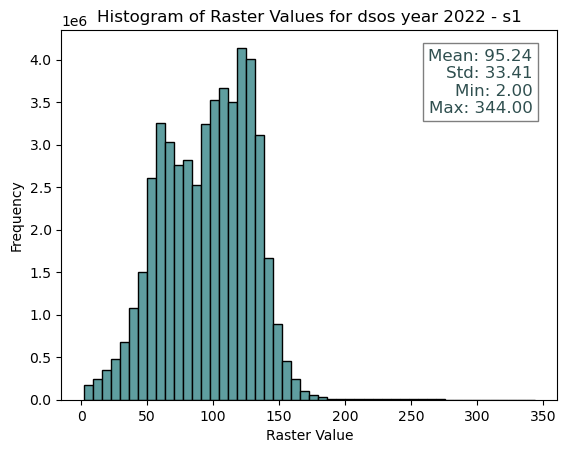

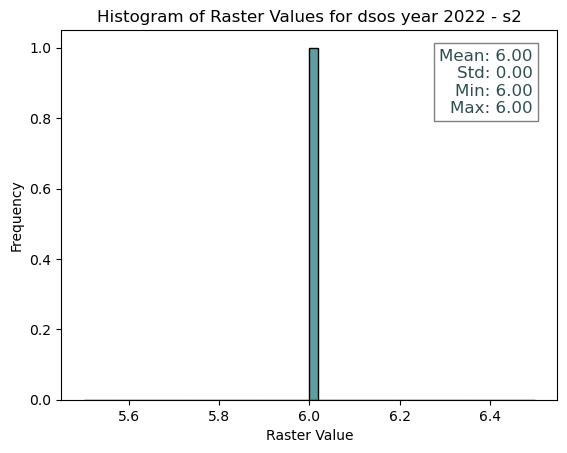

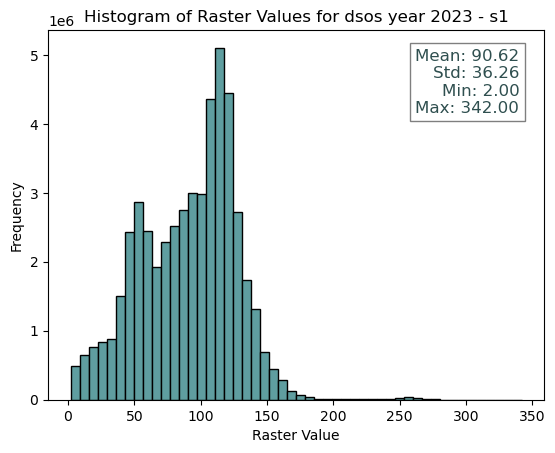

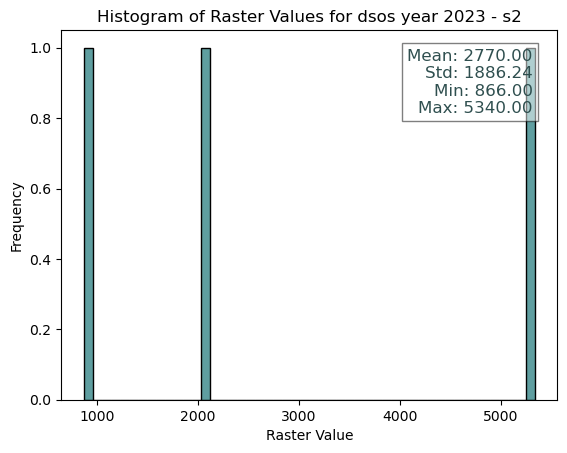

sos_eos  Year Season  Min_val  Max_val     Mean_val  Std_val
0     dsos  2000     s1        1      339    93.856347      339
1     dsos  2000     s2        1    18579  2721.171555    18579
2     dsos  2001     s1        2      344    89.639064      344
3     dsos  2001     s2        1    24057  2211.967633    24057
4     dsos  2002     s1        2      342    91.829428      342
5     dsos  2002     s2        1    24208  1608.916756    24208
6     dsos  2003     s1        2      355    97.920769      355
7     dsos  2003     s2        1    22749  1290.606156    22749
8     dsos  2004     s1        2      343    94.508402      343
9     dsos  2004     s2        1    22532  1006.089789    22532
10    dsos  2005     s1        2      342    95.423279      342
11    dsos  2005     s2        1    20366   730.315771    20366
12    dsos  2006     s1        2      342    93.809767      342
13    dsos  2006     s2        1    10724   814.744180    10724
14    dsos  2007     s1        2      340    91.367183      340
15    dsos  2007     s2        1    21623   546.008953    21623
16    dsos  2008     s1        2      343    93.041447      343
17    dsos  2008     s2        1    20536   547.623338    20536
18    dsos  2009     s1        2      342    93.678331      342
19    dsos  2009     s2        1    17059   519.734738    17059
20    dsos  2010     s1        2      337    92.670514      337
21    dsos  2010     s2        1    15402   786.853119    15402
22    dsos  2011     s1        2      342    94.731552      342
23    dsos  2011     s2        2    17407   761.608479    17407
24    dsos  2012     s1        2      342    94.817965      342
25    dsos  2012     s2       47    11842  1298.893204    11842
26    dsos  2013     s1        2      342    92.931767      342
27    dsos  2013     s2       29    13731  1635.586957    13731
28    dsos  2014     s1        2      341    89.359791      341
29    dsos  2014     s2       42     8341  1391.848485     8341
30    dsos  2015     s1        2      343    93.875254      343
31    dsos  2015     s2       98    13828  2189.066667    13828
32    dsos  2016     s1        2      341    92.398797      341
33    dsos  2016     s2       81    12739  4810.571429    12739
34    dsos  2017     s1        2      343    94.588747      343
35    dsos  2017     s2       68     8784  1580.500000     8784
36    dsos  2018     s1        2      343    91.422897      343
37    dsos  2018     s2      530    10870  4853.800000    10870
38    dsos  2019     s1        2      339    91.738161      339
39    dsos  2019     s2      464     9791  3758.375000     9791
40    dsos  2020     s1        2      341    93.278258      341
41    dsos  2020     s2      280     3643  1092.666667     3643
42    dsos  2021     s1        2      342    93.524335      342
43    dsos  2021     s2       13     7789  3424.500000     7789
44    dsos  2022     s1        2      344    95.236787      344
45    dsos  2022     s2        6        6     6.000000        6
46    dsos  2023     s1        2      342    90.615571      342
47    dsos  2023     s2      866     5340  2770.000000     5340

In [58]:
# Example usage for sos
folder_path_sos = r'A:\Copernicus\MR-VPP\reclassified_dsos'  
raster_paths_sos = get_raster_paths(folder_path_sos)
df_sos = plot_raster_histogram(raster_paths_sos)
df_sos

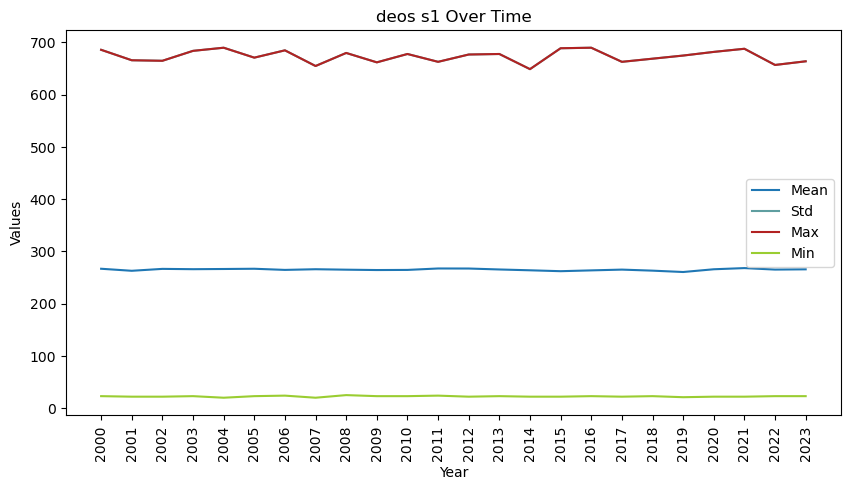

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrame
df0 = df

# Set the 'Date' column as the index
#df.set_index('Year', inplace=True)

dfs1 = df.query("Season == 's1'")


# Plot the variables
plt.figure(figsize=(10, 5))
plt.plot(dfs1.index, dfs1['Mean_val'], label='Mean')
plt.plot(dfs1.index, dfs1['Std_val'], label='Std', color='cadetblue')
#plt.plot(dfs1.index,  dfs1['Mean_val'] + 1 * dfs1['Std_val'], label='Mean+1Std', color='cadetblue')
#plt.plot(dfs1.index,  dfs1['Mean_val'] - 1 * dfs1['Std_val'], label='Mean-1Std',  color='cadetblue')
plt.plot(dfs1.index,  dfs1['Max_val'] , label='Max',   color='firebrick')
plt.plot(dfs1.index,  dfs1['Min_val'] , label='Min',   color='yellowgreen')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.title(f'{dfs1.sos_eos[0]} {dfs1.Season[0]} Over Time')
plt.legend()

# Display the plot
plt.show()


In [63]:
 df.query("Season == 's1'")

sos_eos Season  Min_val  Max_val    Mean_val  Std_val
Year                                                      
2000    deos     s1       23      686  266.880463      686
2001    deos     s1       22      666  262.986771      666
2002    deos     s1       22      665  266.640727      665
2003    deos     s1       23      684  266.039429      684
2004    deos     s1       20      690  266.415613      690
2005    deos     s1       23      671  266.882906      671
2006    deos     s1       24      685  264.688188      685
2007    deos     s1       20      655  265.968427      655
2008    deos     s1       25      680  265.104680      680
2009    deos     s1       23      662  264.415921      662
2010    deos     s1       23      678  264.653457      678
2011    deos     s1       24      663  267.402804      663
2012    deos     s1       22      677  267.315867      677
2013    deos     s1       23      678  265.503005      678
2014    deos     s1       22      649  263.929256      649
2015    deos     s1       22      689  262.212425      689
2016    deos     s1       23      690  263.766466      690
2017    deos     s1       22      663  265.253677      663
2018    deos     s1       23      669  263.252442      669
2019    deos     s1       21      675  260.651560      675
2020    deos     s1       22      682  265.902196      682
2021    deos     s1       22      688  268.144012      688
2022    deos     s1       23      657  265.293023      657
2023    deos     s1       23      664  265.776234      664

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrame
df0 = df

# Set the 'Date' column as the index
#df.set_index('Year', inplace=True)

dfs1 = df.query("Season == 's2'")


# Plot the variables
plt.figure(figsize=(10, 5))
plt.plot(dfs1.index, dfs1['Mean_val'], label='Mean')
plt.plot(dfs1.index, dfs1['Std_val'], label='Std', color='cadetblue')
#plt.plot(dfs1.index,  dfs1['Mean_val'] + 1 * dfs1['Std_val'], label='Mean+1Std', color='cadetblue')
#plt.plot(dfs1.index,  dfs1['Mean_val'] - 1 * dfs1['Std_val'], label='Mean-1Std',  color='cadetblue')
plt.plot(dfs1.index,  dfs1['Max_val'] , label='Max',   color='firebrick')
plt.plot(dfs1.index,  dfs1['Min_val'] , label='Min',   color='yellowgreen')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.title(f'{dfs1.sos_eos[0]} {dfs1.Season[0]} Over Time')
plt.legend()

# Display the plot
plt.show()

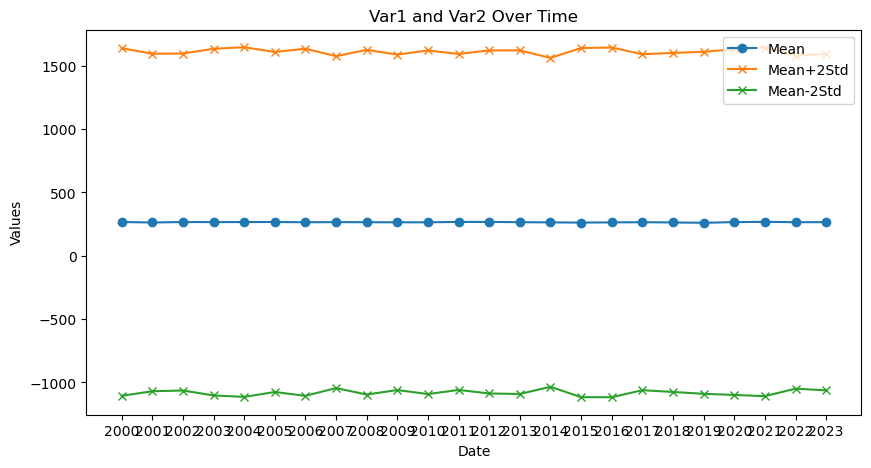

In [82]:
dfs1 = df.query("Season == 's1'")


# Plot the variables
plt.figure(figsize=(10, 5))
plt.plot(dfs1.index, dfs1['Mean_val'], label='Mean', marker='o')
plt.plot(dfs1.index,  dfs1['Mean_val'] + 2 * dfs1['Std_val'], label='Mean+2Std', marker='x')
plt.plot(dfs1.index,  dfs1['Mean_val'] - 2 * dfs1['Std_val'], label='Mean-2Std', marker='x')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Var1 and Var2 Over Time')
plt.legend()

# Display the plot
plt.show()


In [ ]:
import rasterio

# Open the raster file
with rasterio.open('path/to/your/raster.tif') as src:
    nodata_value = src.nodata

print(f"NoData value: {nodata_value}")
